In [1]:
from datasets import load_dataset
ds = load_dataset("tarteel-ai/quran-tafsir")

c:\Users\MSC008\miniconda3\envs\py310\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(
c:\Users\MSC008\miniconda3\envs\py310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
print(ds)

DatasetDict({
    train: Dataset({
        features: ['en-ahmedali', 'en-ahmedraza', 'en-arberry', 'en-asad', 'en-daryabadi', 'en-hilali', 'en-itani', 'en-maududi', 'en-mubarakpuri', 'en-pickthall', 'en-qarai', 'en-qaribullah', 'en-sahih', 'en-sarwar', 'en-shakir', 'en-transliterati', 'en-wahiduddi', 'en-yusufali', 'surah', 'ayah'],
        num_rows: 6236
    })
})


In [3]:
for i in range(5):
  print(ds['train'][i])
  print(i)



{'en-ahmedali': 'In the name of Allah, most benevolent, ever-merciful.', 'en-ahmedraza': 'Allah - beginning with the name of - the Most Gracious, the Most Merciful.', 'en-arberry': 'In the Name of God, the Merciful, the Compassionate', 'en-asad': 'In the name of God, The Most Gracious, The Dispenser of Grace:', 'en-daryabadi': 'In the name of Allah, the Compassionate, the Merciful.', 'en-hilali': 'In the Name of Allah, the Most Beneficent, the Most Merciful.', 'en-itani': 'In the name of God, the Gracious, the Merciful.', 'en-maududi': 'In the name of Allah, the Merciful, the Compassionate', 'en-mubarakpuri': 'In the Name of Allah, the Most Gracious, the Most Merciful.', 'en-pickthall': 'In the name of Allah, the Beneficent, the Merciful.', 'en-qarai': 'In the Name of Allah, the All-beneficent, the All-merciful.', 'en-qaribullah': 'In the Name of Allah, the Merciful, the Most Merciful', 'en-sahih': 'In the name of Allah, the Entirely Merciful, the Especially Merciful.', 'en-sarwar': 'I

In [4]:
import pandas as pd
import re
from datasets import load_dataset

df = ds['train'][:]
df = pd.DataFrame(df)  # Convert from dict to DataFrame
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

columns_to_clean = [
    'en-ahmedraza', 'en-arberry', 'en-asad', 'en-daryabadi', 'en-hilali',
    'en-itani', 'en-maududi', 'en-mubarakpuri', 'en-pickthall', 'en-qarai',
    'en-sahih', 'en-sarwar', 'en-shakir', 'en-transliterati', 'en-wahiduddi',
    'en-yusufali', 'surah', 'ayah'
]

def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'<.*?>', '', text)
        text = re.sub(r'\s+', ' ', text)
        return text.strip()
    return text

for col in columns_to_clean:
    if col in df.columns:
        df[col] = df[col].apply(clean_text)

df = df.drop_duplicates()
df = df.dropna(subset=columns_to_clean)
df.to_csv("cleaned_multicolumn_tafsir.csv", index=False)



C:\Users\MSC008\AppData\Local\Temp\ipykernel_39916\3414052086.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [5]:
import pandas as pd

# Load the dataset

# Total number of data points (rows × columns)
total_rows = df.shape[0]
total_columns = df.shape[1]
total_data_points = df.size

print(f"Total rows: {total_rows}")
print(f"Total columns: {total_columns}")
print(f"Total data points: {total_data_points}")


Total rows: 6236
Total columns: 20
Total data points: 124720


In [6]:
import pandas as pd

# Load cleaned dataset
# Ensure 'surah' and 'ayah' are numeric
df['surah'] = pd.to_numeric(df['surah'], errors='coerce')
df['ayah'] = pd.to_numeric(df['ayah'], errors='coerce')

# Drop rows with missing values in numeric columns
df = df.dropna(subset=['surah', 'ayah'])

# Convert to integer for stats
df['surah'] = df['surah'].astype(int)
df['ayah'] = df['ayah'].astype(int)

# Summary for numeric columns
def print_stats(column):
    print(f"\n📈 Statistics for '{column}':")
    print(f"  Count  : {df[column].count()}")
    print(f"  Unique : {df[column].nunique()}")
    print(f"  Min    : {df[column].min()}")
    print(f"  Max    : {df[column].max()}")
    print(f"  Mean   : {df[column].mean():.2f}")
    print(f"  Median : {df[column].median()}")
    print(f"  Mode   : {df[column].mode().iloc[0]}")

# Run stats on 'surah' and 'ayah'
print_stats('surah')
print_stats('ayah')



📈 Statistics for 'surah':
  Count  : 6236
  Unique : 114
  Min    : 0
  Max    : 113
  Mean   : 32.52
  Median : 25.0
  Mode   : 1

📈 Statistics for 'ayah':
  Count  : 6236
  Unique : 286
  Min    : 0
  Max    : 285
  Mean   : 52.51
  Median : 37.0
  Mode   : 0


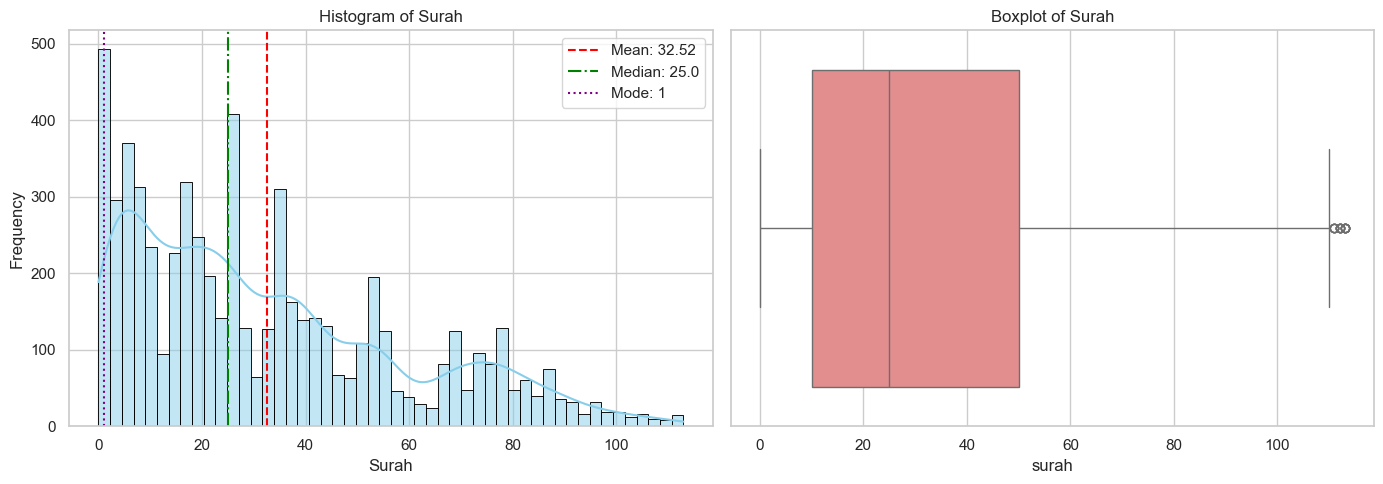

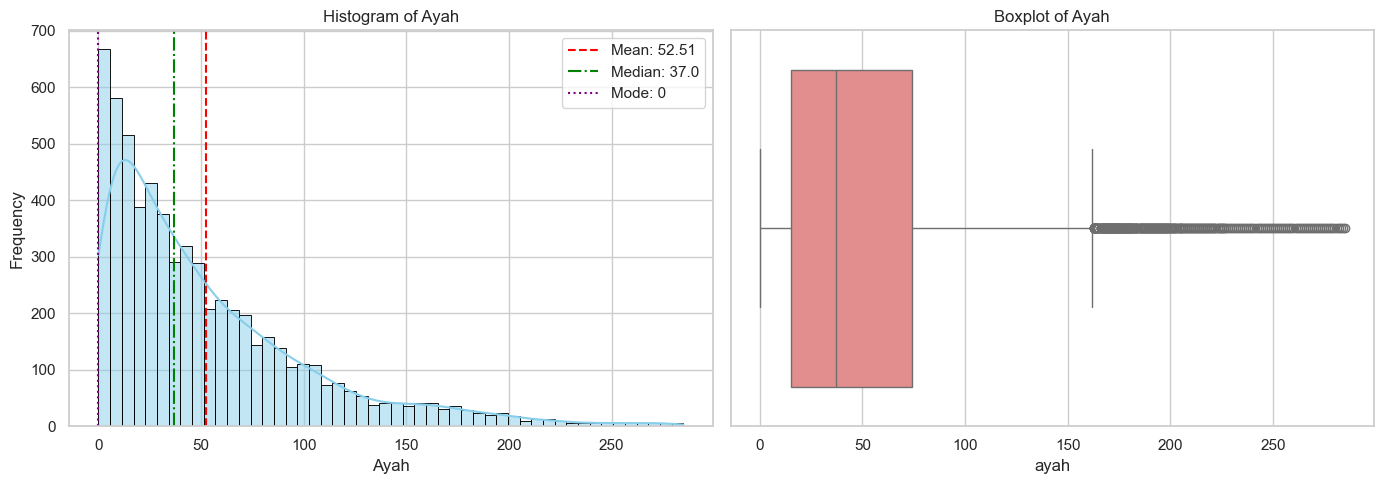

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
# Convert columns to numeric
df['surah'] = pd.to_numeric(df['surah'], errors='coerce')
df['ayah'] = pd.to_numeric(df['ayah'], errors='coerce')
df = df.dropna(subset=['surah', 'ayah'])
df['surah'] = df['surah'].astype(int)
df['ayah'] = df['ayah'].astype(int)

# Plot settings
sns.set(style="whitegrid")
numeric_cols = ['surah', 'ayah']

# Visualize each column
for col in numeric_cols:
    plt.figure(figsize=(14, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=50, kde=True, color='skyblue', edgecolor='black')
    plt.axvline(df[col].mean(), color='red', linestyle='--', label=f"Mean: {df[col].mean():.2f}")
    plt.axvline(df[col].median(), color='green', linestyle='-.', label=f"Median: {df[col].median()}")
    mode = df[col].mode().iloc[0] if not df[col].mode().empty else None
    if mode is not None:
        plt.axvline(mode, color='purple', linestyle=':', label=f"Mode: {mode}")
    plt.title(f"Histogram of {col.capitalize()}")
    plt.xlabel(col.capitalize())
    plt.ylabel("Frequency")
    plt.legend()

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f"Boxplot of {col.capitalize()}")

    plt.tight_layout()
    plt.show()


First 5 rows:
                                         en-ahmedali  \
0  In the name of Allah, most benevolent, ever-me...   
1    ALL PRAISE BE to Allah, Lord of all the worlds,   
2                    Most beneficent, ever-merciful,   
3                      King of the Day of Judgement.   
4  You alone we worship, and to You alone turn fo...   

                                        en-ahmedraza  \
0  Allah - beginning with the name of - the Most ...   
1  All praise is to Allah, the Lord Of The Creation.   
2               The Most Gracious, the Most Merciful   
3                     Owner of the Day of Recompense   
4  You alone we worship and from You alone we see...   

                                          en-arberry  \
0  In the Name of God, the Merciful, the Compassi...   
1      Praise belongs to God, the Lord of all Being,   
2           the All-merciful, the All-compassionate,   
3                     the Master of the Day of Doom.   
4  Thee only we serve; to Thee a

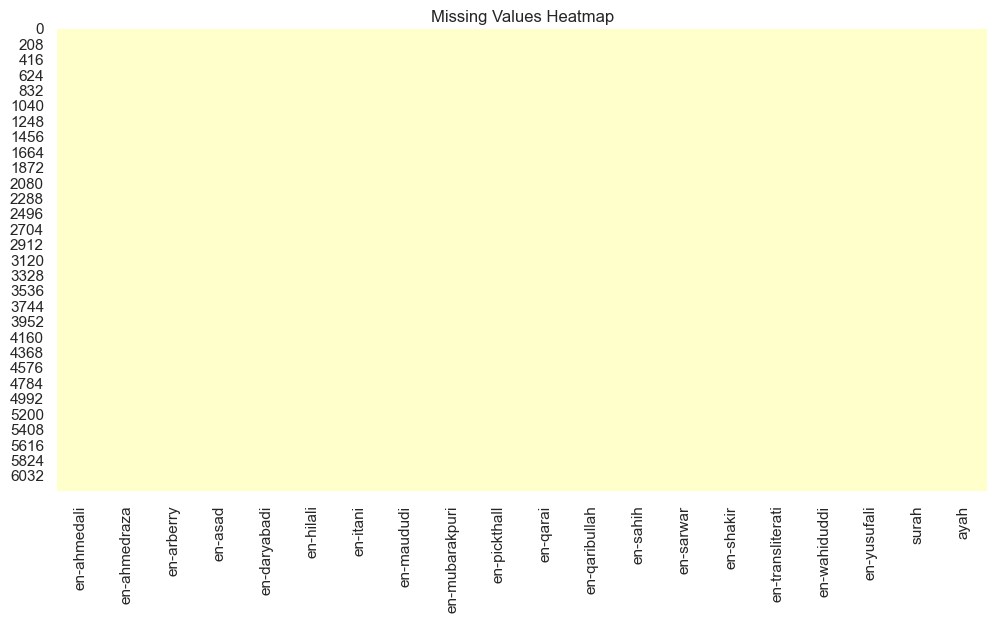

In [8]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset

# Preview the data
print("First 5 rows:")
print(df.head())

# 1. Ensure 'surah' and 'ayah' are numeric
df['surah'] = pd.to_numeric(df['surah'], errors='coerce')
df['ayah'] = pd.to_numeric(df['ayah'], errors='coerce')

# 2. Drop rows with missing surah or ayah
df = df.dropna(subset=['surah', 'ayah'])

# 3. Convert to integer
df['surah'] = df['surah'].astype(int)
df['ayah'] = df['ayah'].astype(int)

# 4. Check missing values across all columns
missing_counts = df.isnull().sum().sort_values(ascending=False)
print("\n📉 Missing value counts:")
print(missing_counts[missing_counts > 0])

# 5. Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="YlOrRd")
plt.title("Missing Values Heatmap")
plt.show()

# 6. Add a new feature: length of tafsir text (e.g., en-yusufali)


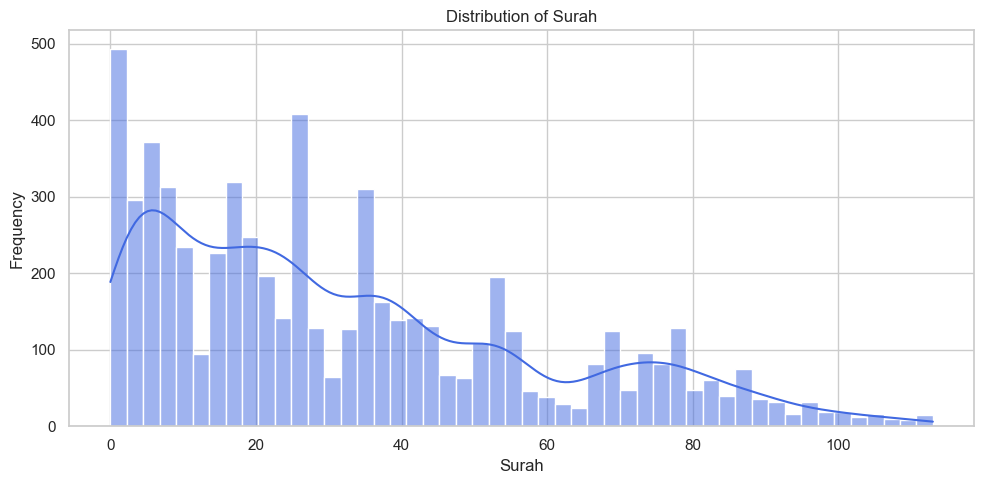

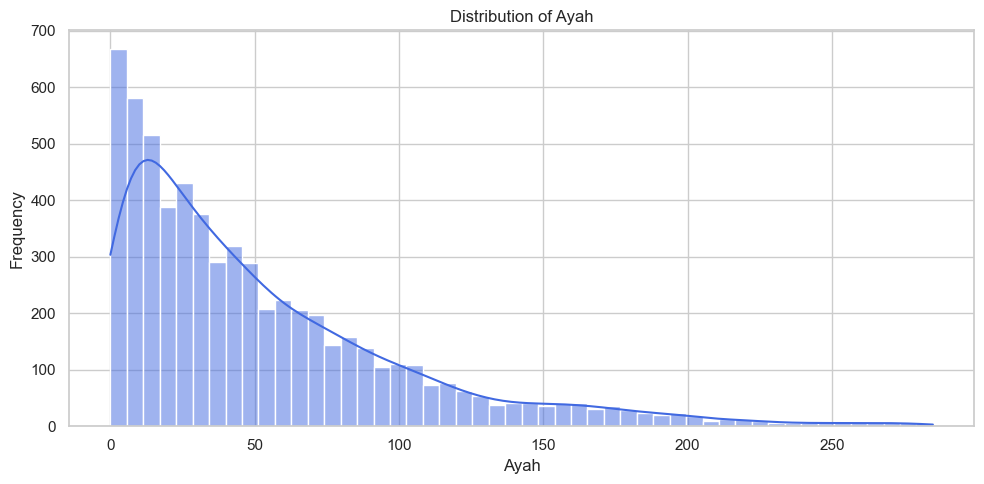

- 'en-ahmedali' - Unique Text Entries: 6168
- 'en-ahmedraza' - Unique Text Entries: 6126
- 'en-arberry' - Unique Text Entries: 6113
- 'en-asad' - Unique Text Entries: 6162
- 'en-daryabadi' - Unique Text Entries: 6165
- 'en-hilali' - Unique Text Entries: 6158
- 'en-itani' - Unique Text Entries: 6137
- 'en-maududi' - Unique Text Entries: 6176
- 'en-mubarakpuri' - Unique Text Entries: 6153
- 'en-pickthall' - Unique Text Entries: 6140
- 'en-qarai' - Unique Text Entries: 6116
- 'en-qaribullah' - Unique Text Entries: 6158
- 'en-sahih' - Unique Text Entries: 6111
- 'en-sarwar' - Unique Text Entries: 6167
- 'en-shakir' - Unique Text Entries: 6142
- 'en-transliterati' - Unique Text Entries: 6057
- 'en-wahiduddi' - Unique Text Entries: 6174
- 'en-yusufali' - Unique Text Entries: 6154


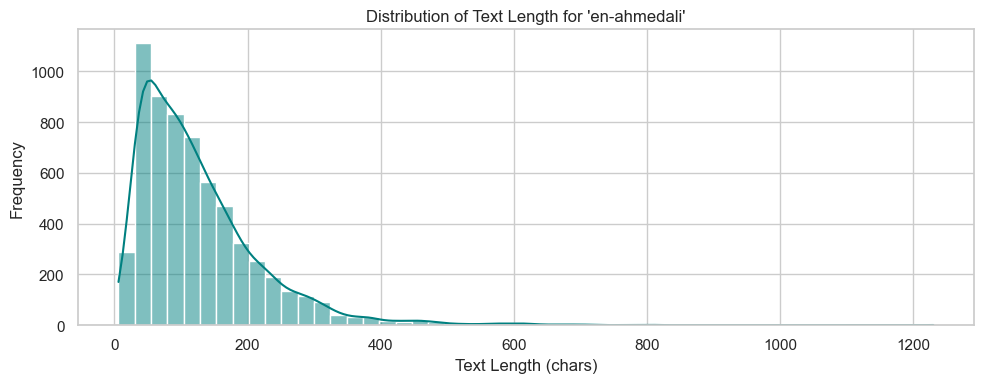

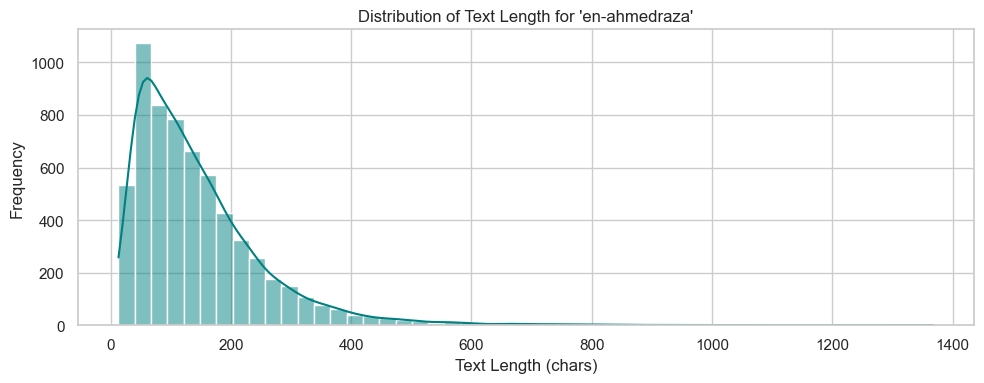

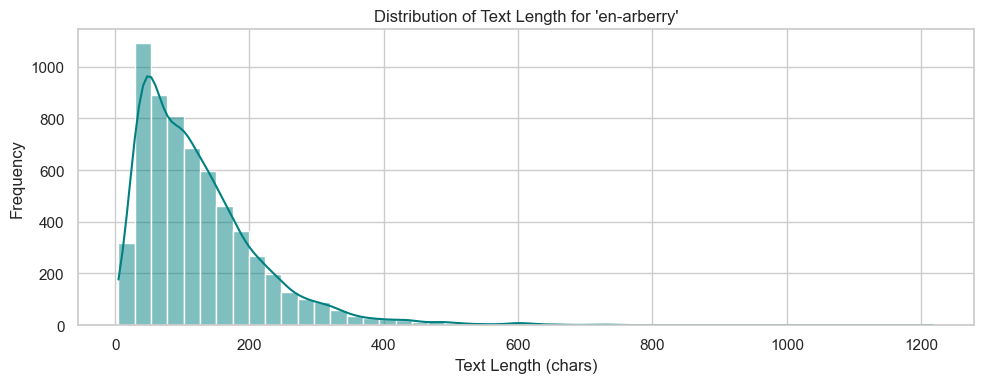

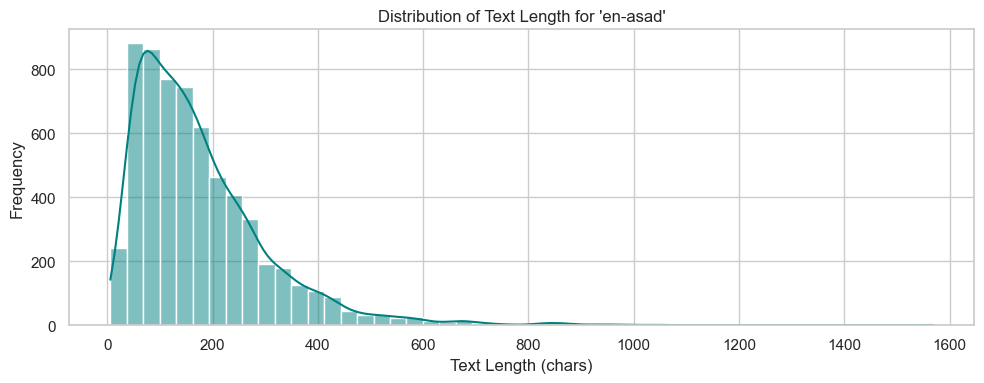

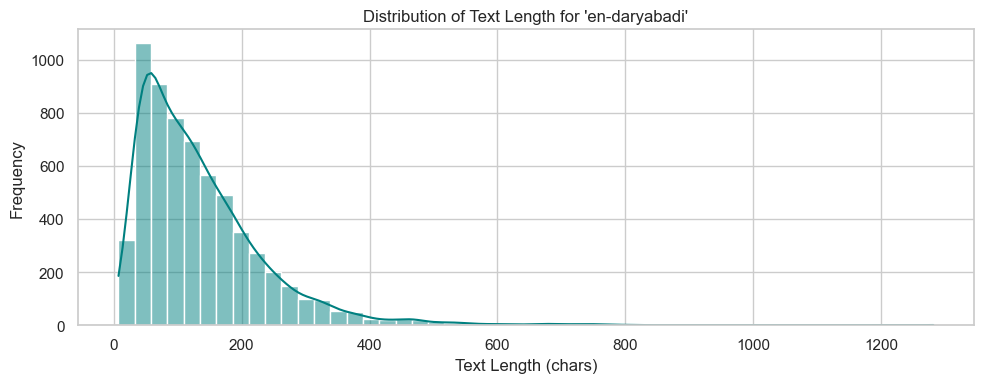

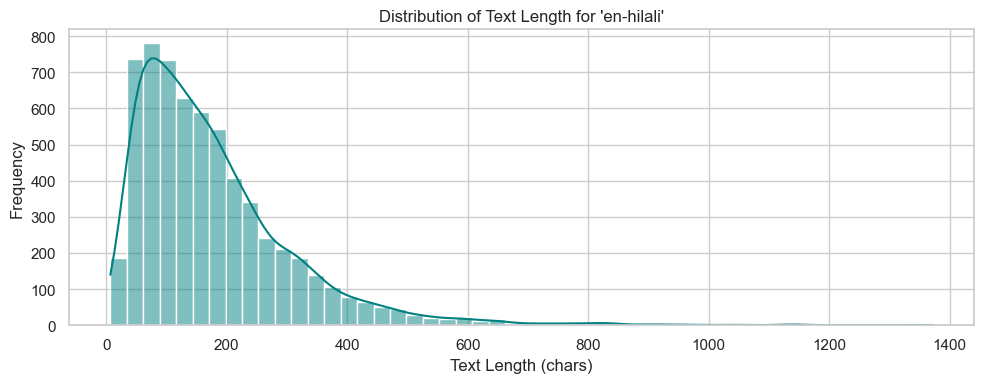

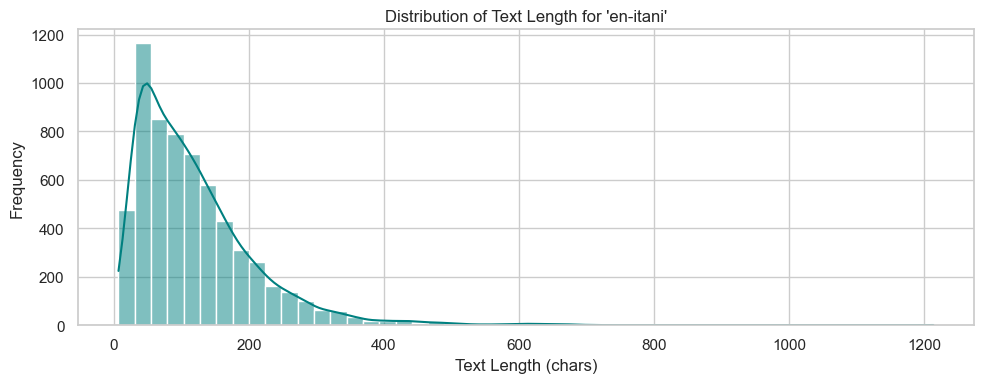

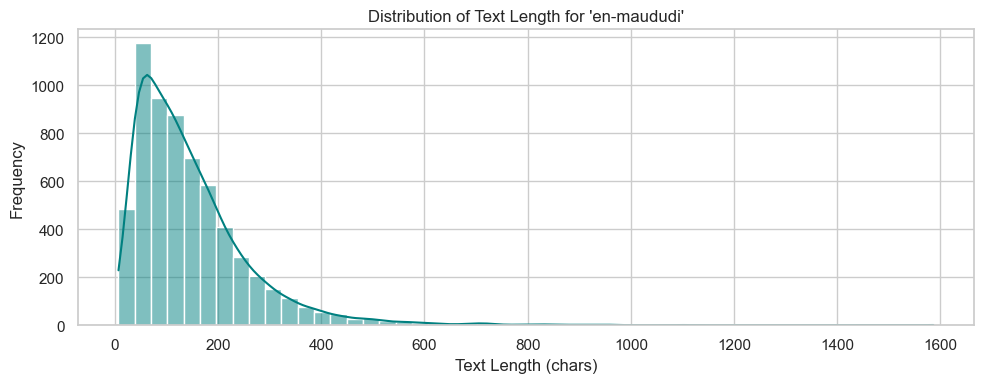

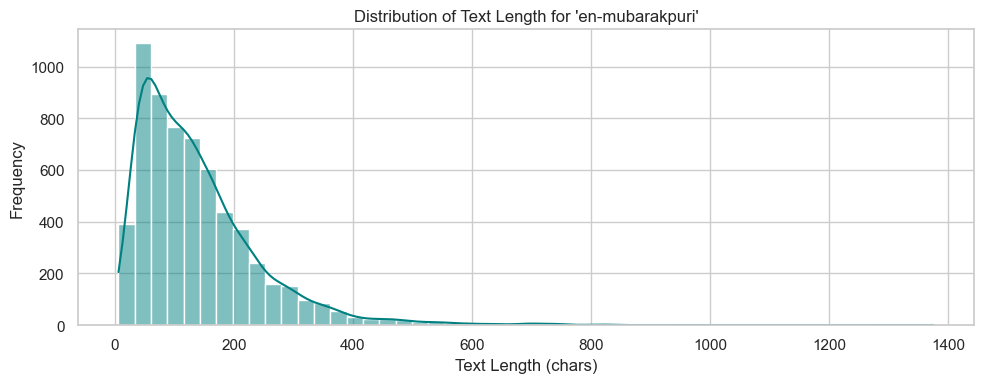

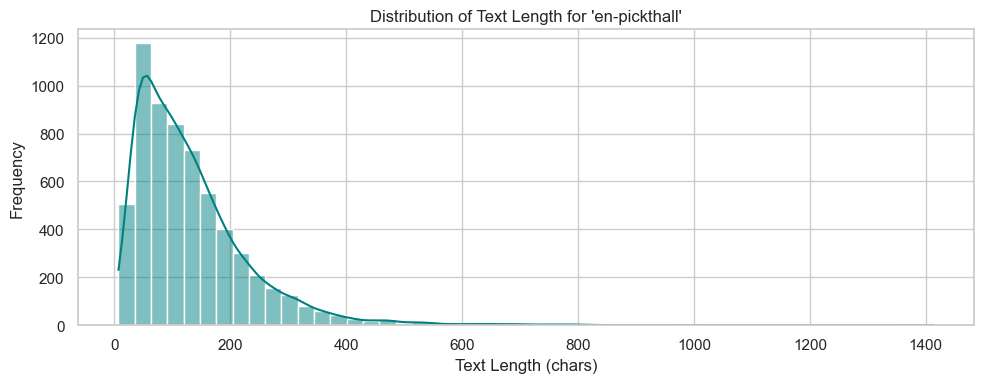

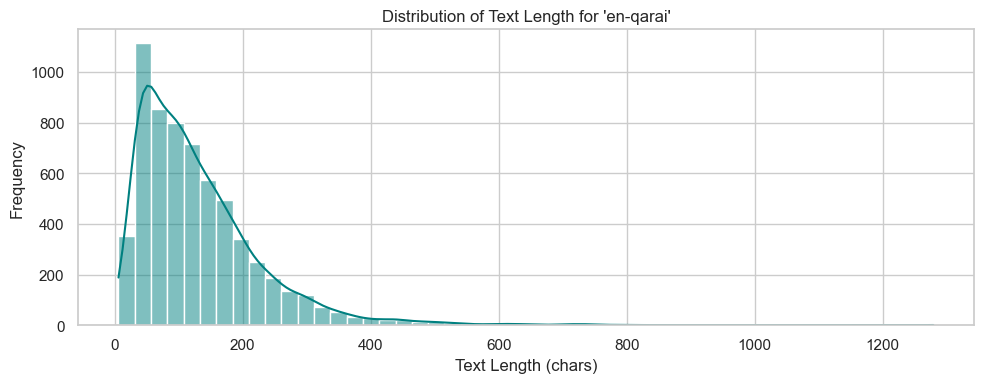

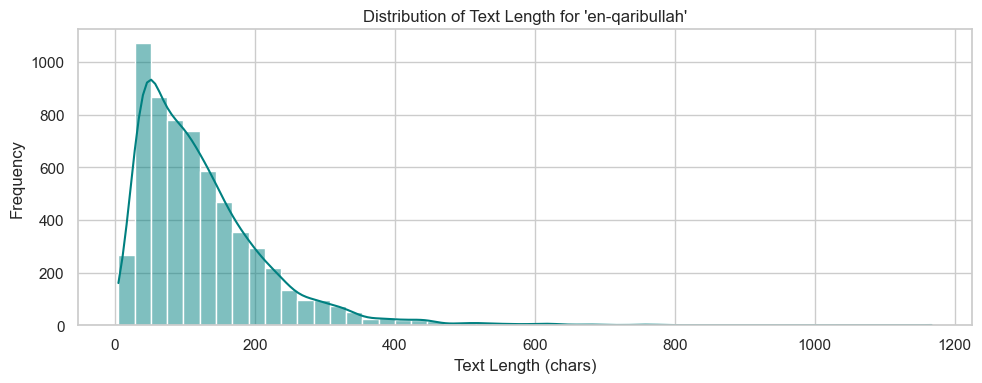

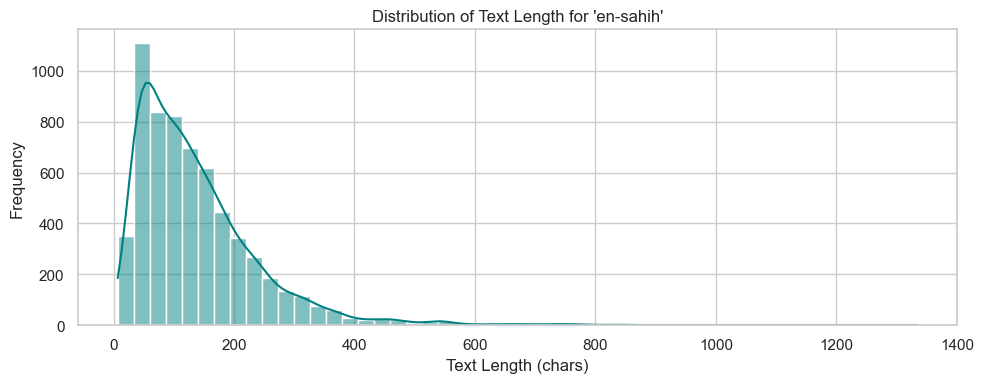

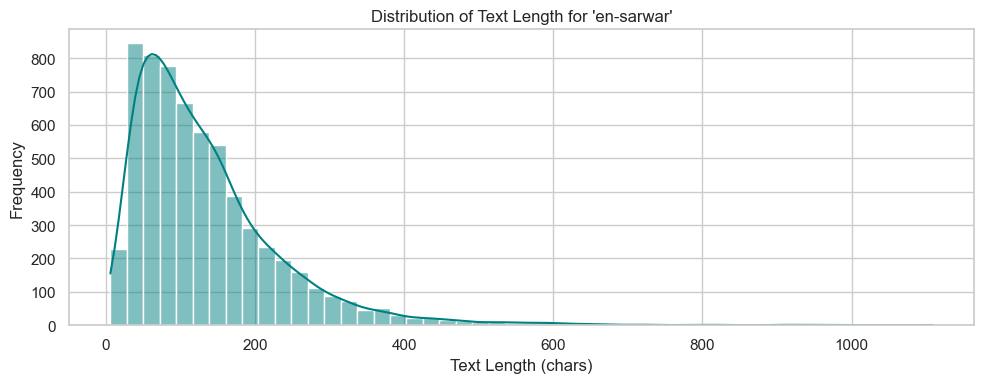

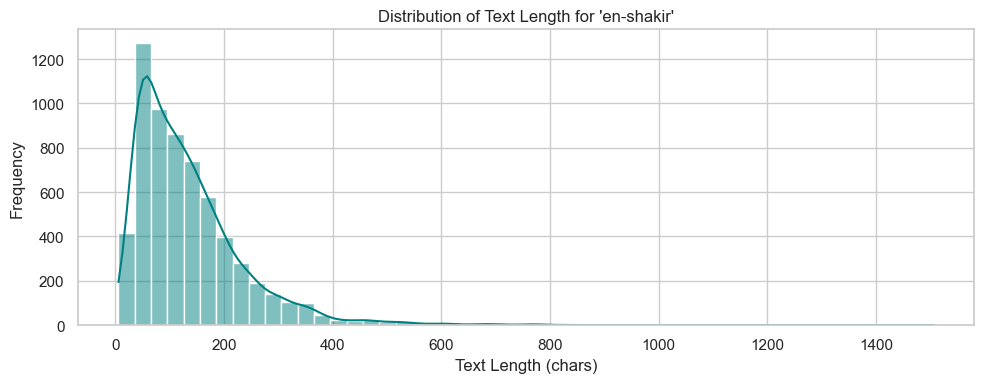

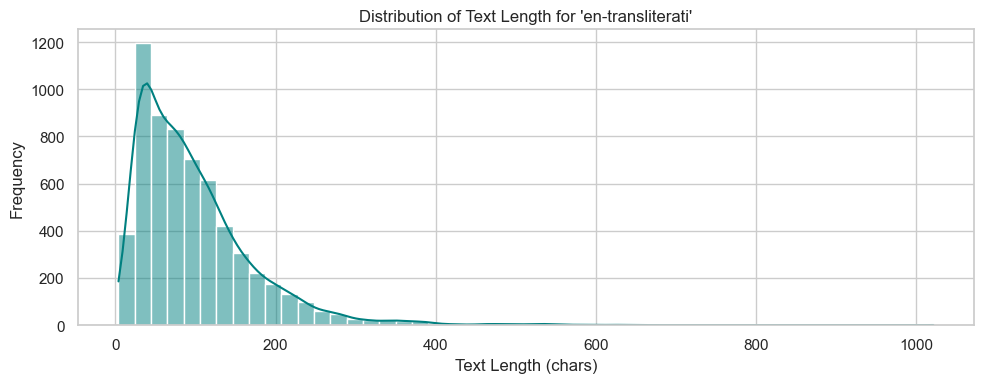

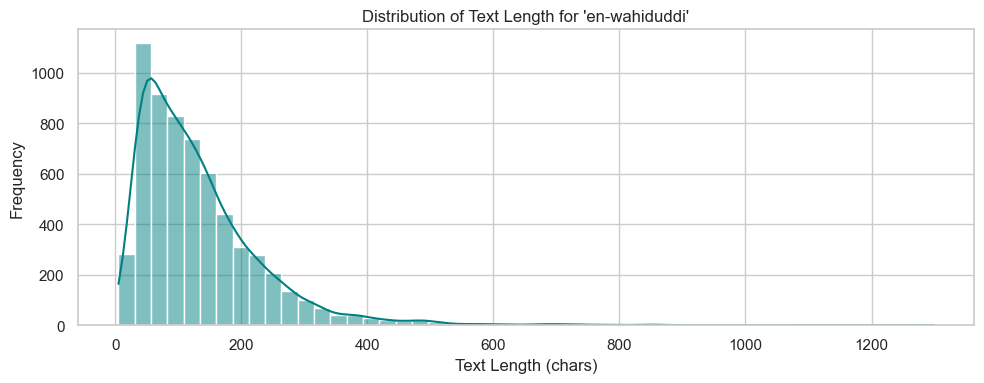

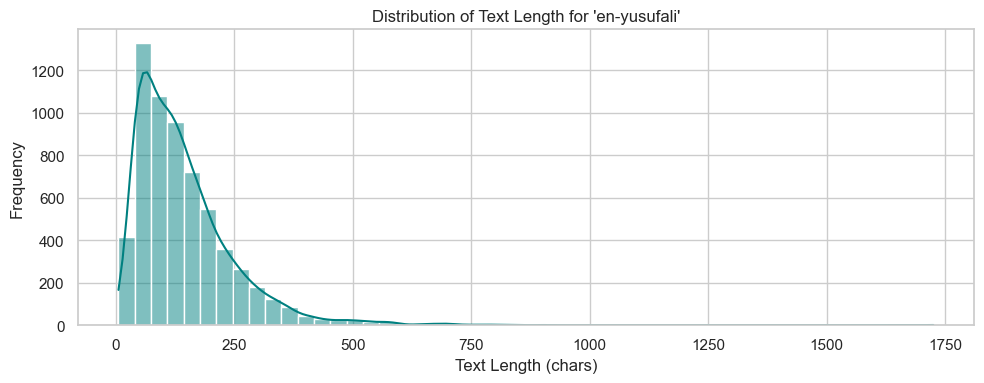

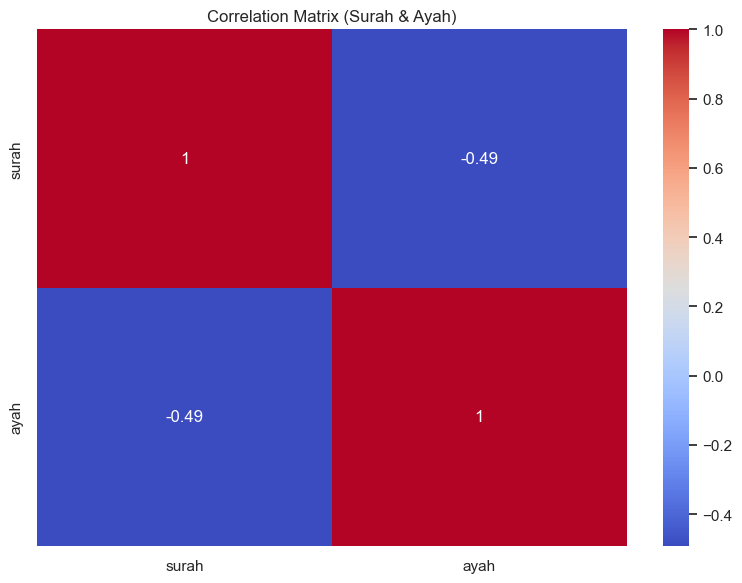

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

# Ensure numeric types
df['surah'] = pd.to_numeric(df['surah'], errors='coerce')
df['ayah'] = pd.to_numeric(df['ayah'], errors='coerce')
df = df.dropna(subset=['surah', 'ayah'])
df['surah'] = df['surah'].astype(int)
df['ayah'] = df['ayah'].astype(int)

# ===== Numeric Variables Distribution =====
numeric_cols = ['surah', 'ayah']
for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], bins=50, kde=True, color='royalblue')
    plt.title(f'Distribution of {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# ===== Categorical Variables: Unique Counts =====
text_cols = [col for col in df.columns if col.startswith('en-')]
for col in text_cols:
    unique_vals = df[col].nunique()
    print(f"- '{col}' - Unique Text Entries: {unique_vals}")

# ===== Tafsir Text Length Analysis =====
for col in text_cols:
    df[f'{col}_length'] = df[col].astype(str).apply(len)

    plt.figure(figsize=(10, 4))
    sns.histplot(df[f'{col}_length'], bins=50, kde=True, color='teal')
    plt.title(f"Distribution of Text Length for '{col}'")
    plt.xlabel('Text Length (chars)')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# ===== Correlation Matrix (numeric only) =====
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Surah & Ayah)')
plt.tight_layout()
plt.show()


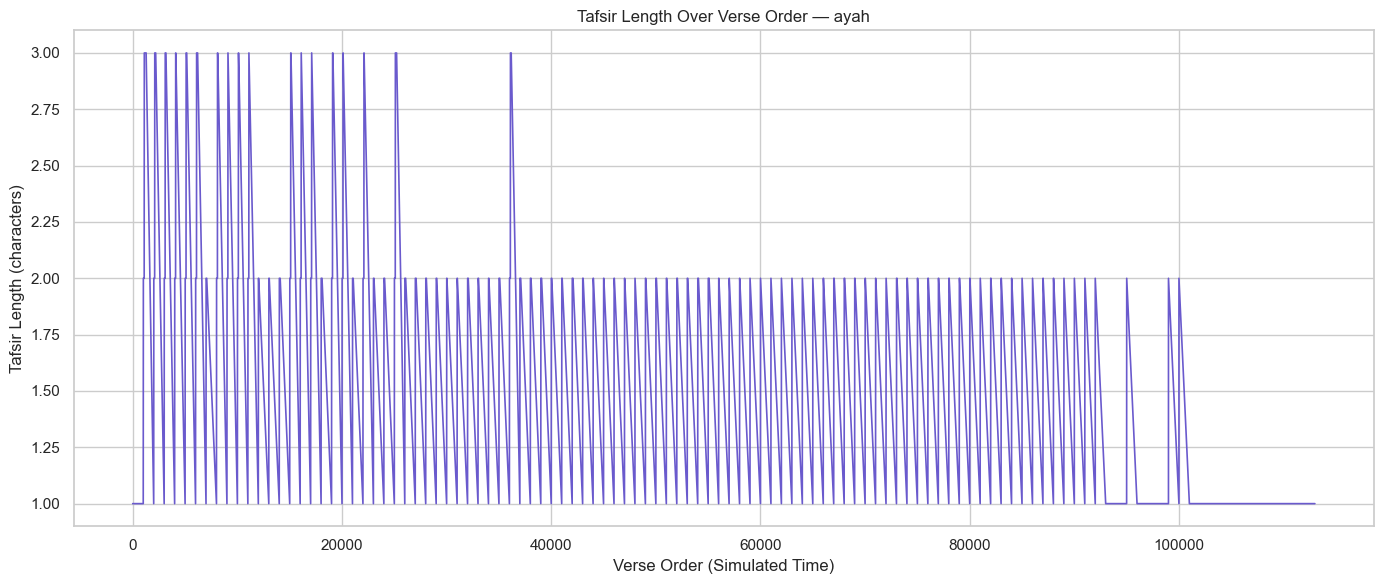

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

# Ensure numeric
df['surah'] = pd.to_numeric(df['surah'], errors='coerce')
df['ayah'] = pd.to_numeric(df['ayah'], errors='coerce')
df = df.dropna(subset=['surah', 'ayah'])
df['surah'] = df['surah'].astype(int)
df['ayah'] = df['ayah'].astype(int)

# Create a "verse_index" as a proxy for time (surah * 1000 + ayah ensures order)
df['verse_index'] = df['surah'] * 1000 + df['ayah']

# Choose one tafsir column (you can loop this later)
for i in columns_to_clean:
  if i not in df.columns:
    raise ValueError(f"Column '{i}' not found in dataset")

# Calculate text length as signal over "time"
df['tafsir_length'] = df[i].astype(str).apply(len)

# Plot tafsir length over verse order
plt.figure(figsize=(14, 6))
sns.lineplot(x='verse_index', y='tafsir_length', data=df, color='slateblue', linewidth=1.2)
plt.title(f"Tafsir Length Over Verse Order — {i}")
plt.xlabel("Verse Order (Simulated Time)")
plt.ylabel("Tafsir Length (characters)")
plt.tight_layout()
plt.show()



🔍 Processing column: en-ahmedraza
  Removed 239 outliers.


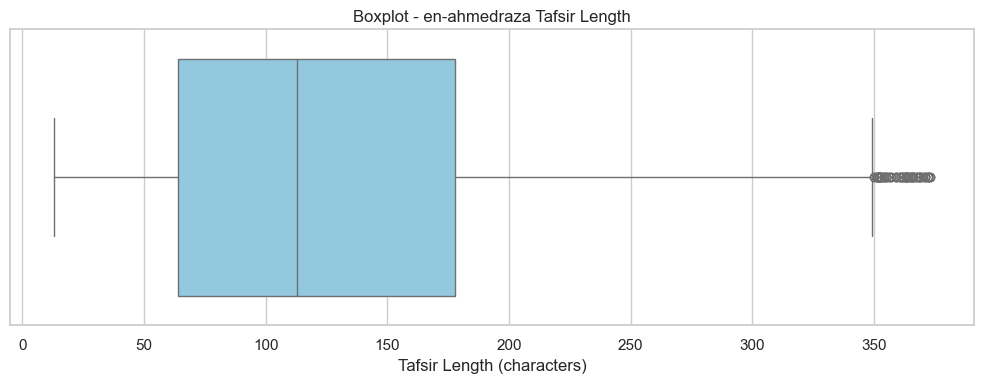


🔍 Processing column: en-arberry
  Removed 88 outliers.


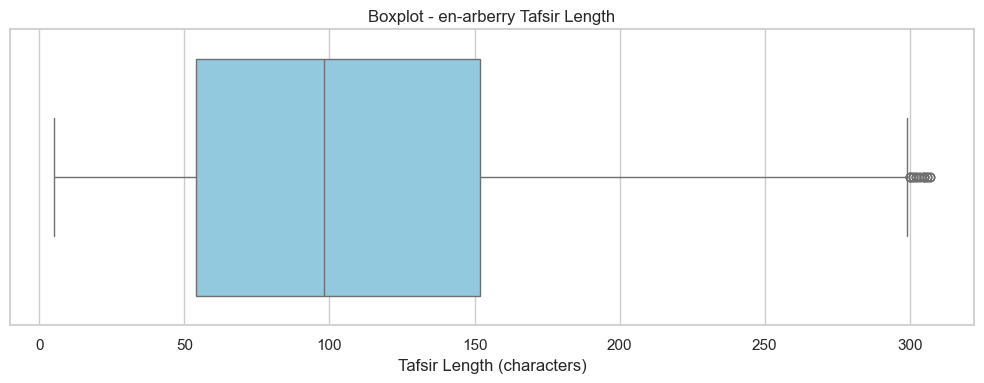


🔍 Processing column: en-asad
  Removed 65 outliers.


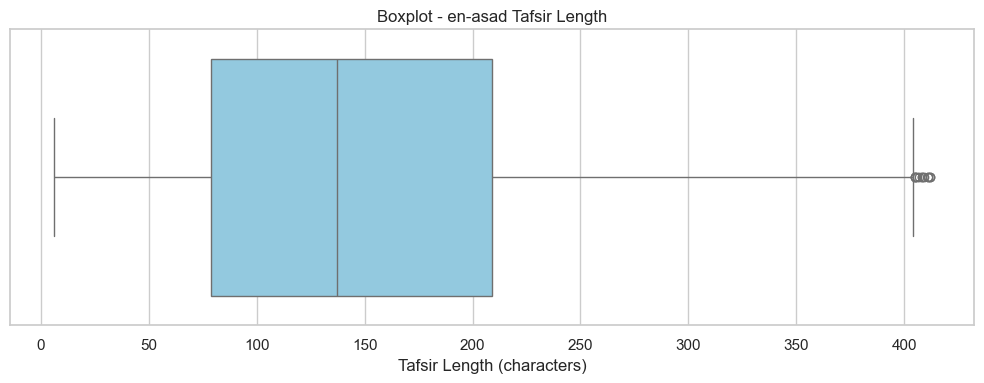


🔍 Processing column: en-daryabadi
  Removed 35 outliers.


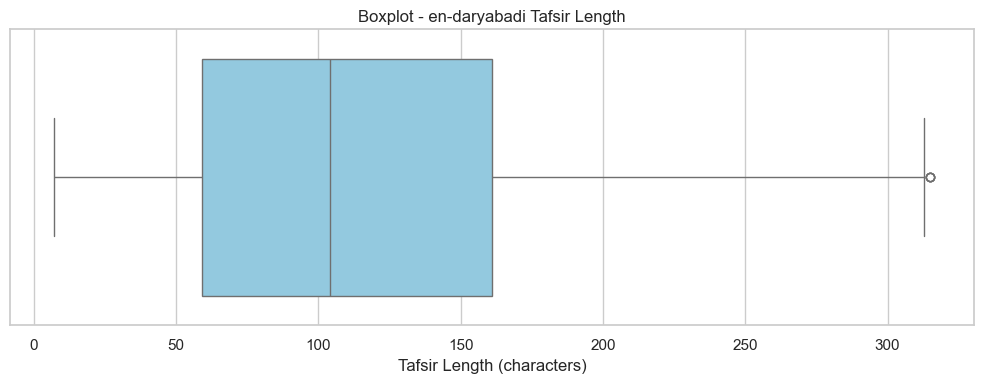


🔍 Processing column: en-hilali
  Removed 93 outliers.


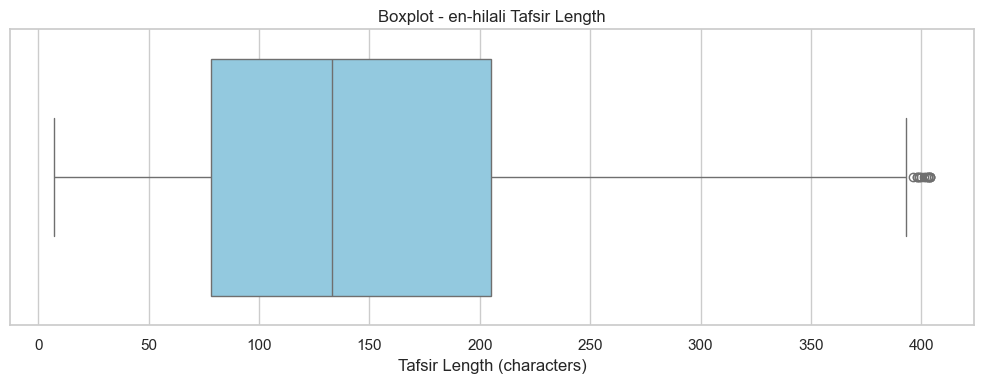


🔍 Processing column: en-itani
  Removed 23 outliers.


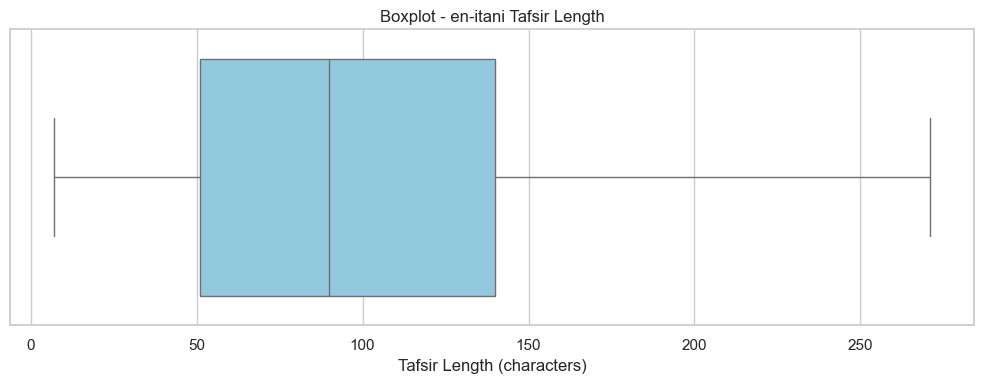


🔍 Processing column: en-maududi
  Removed 41 outliers.


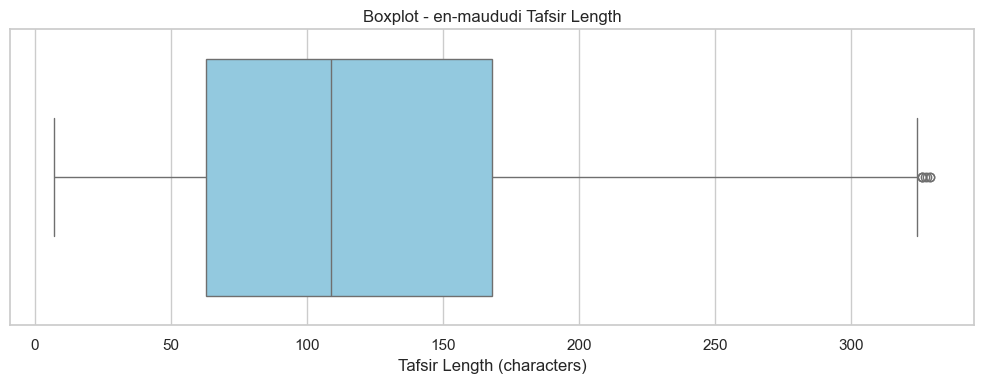


🔍 Processing column: en-mubarakpuri
  Removed 18 outliers.


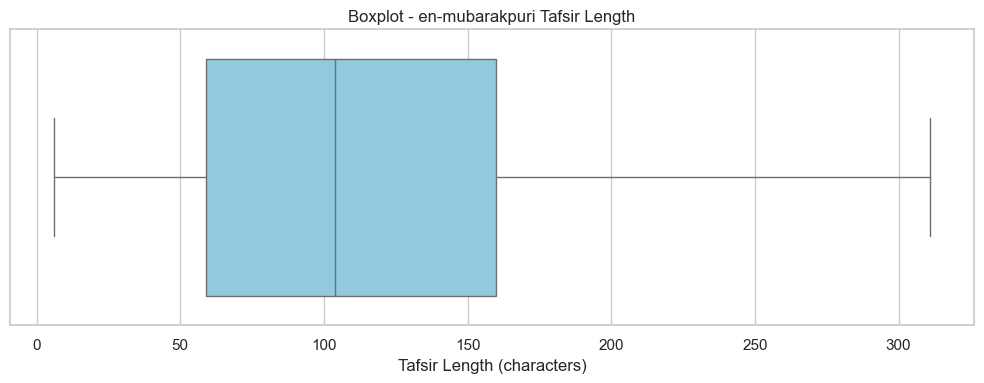


🔍 Processing column: en-pickthall
  Removed 20 outliers.


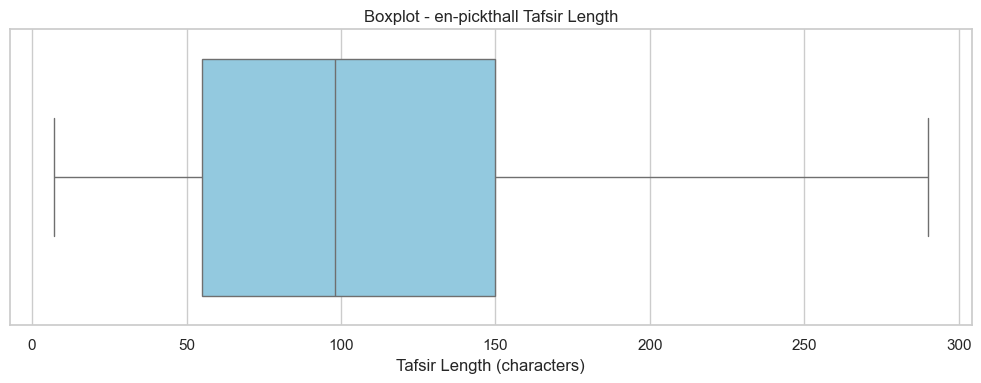


🔍 Processing column: en-qarai
  Removed 11 outliers.


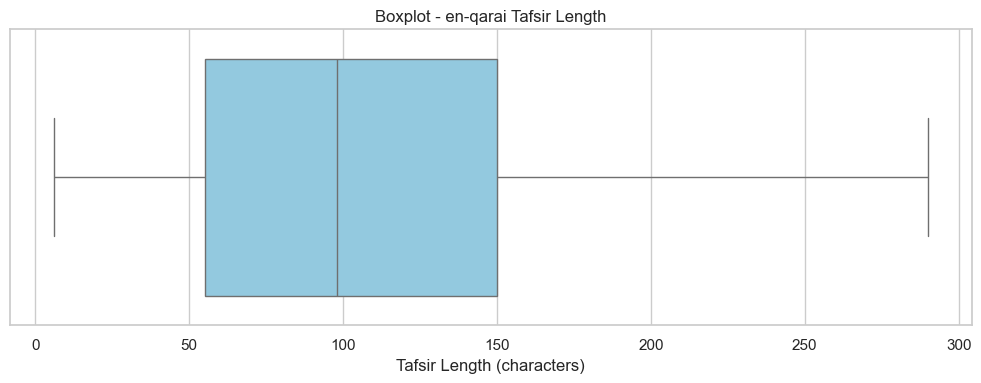


🔍 Processing column: en-sahih
  Removed 8 outliers.


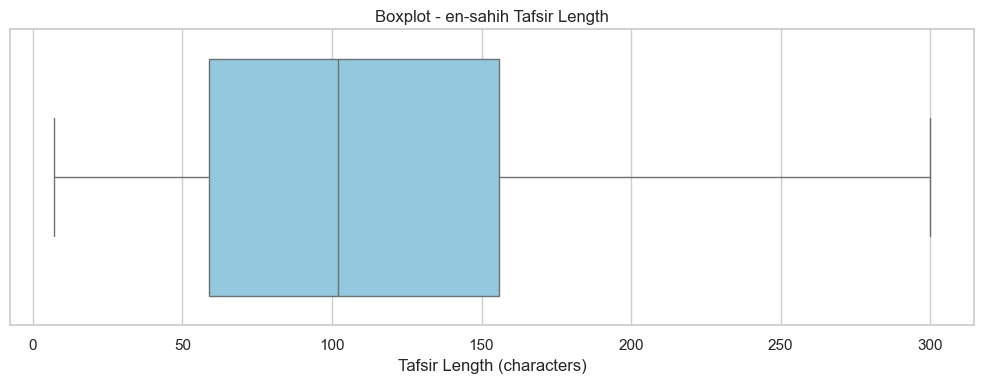


🔍 Processing column: en-sarwar
  Removed 33 outliers.


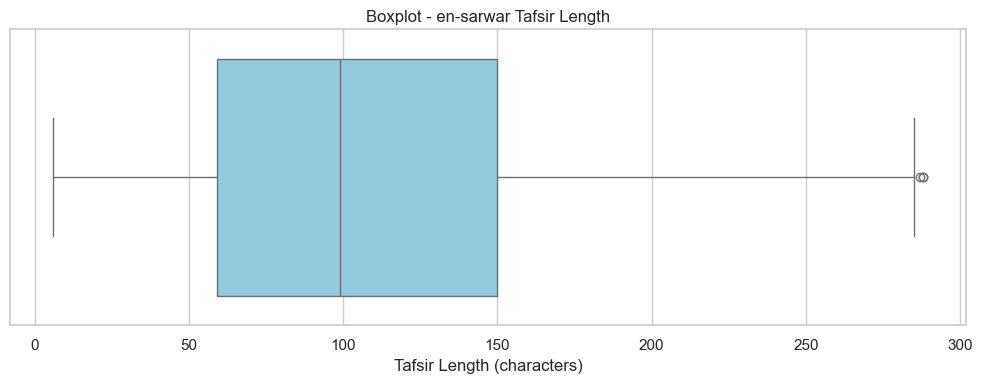


🔍 Processing column: en-shakir
  Removed 15 outliers.


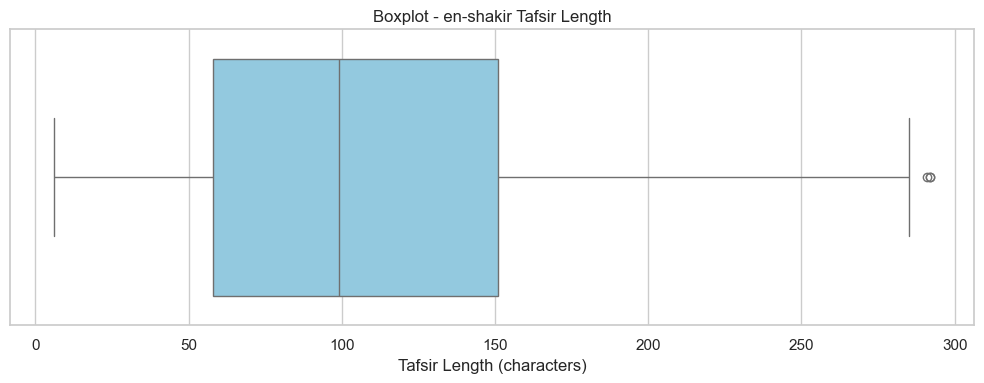


🔍 Processing column: en-transliterati
  Removed 7 outliers.


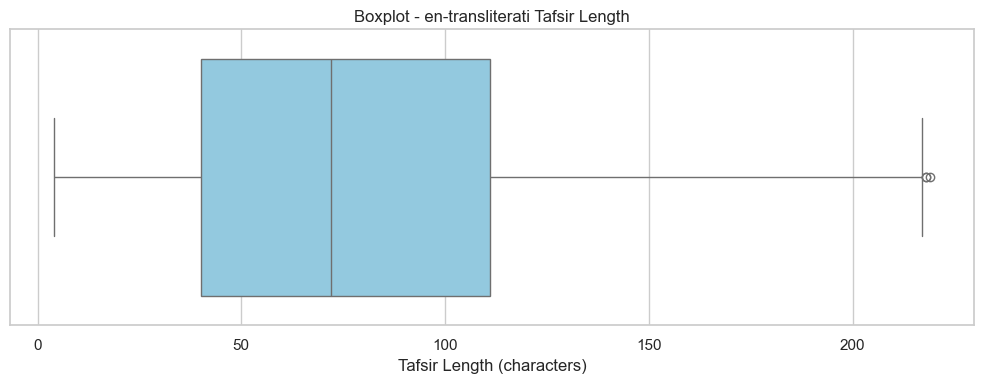


🔍 Processing column: en-wahiduddi
  Removed 16 outliers.


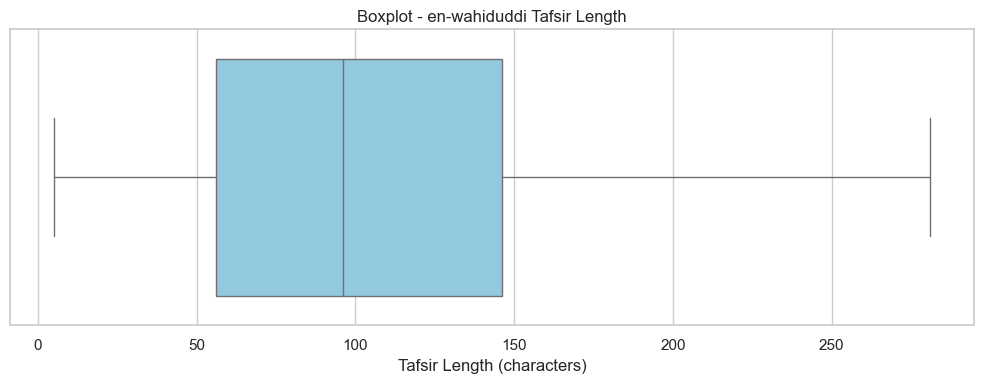


🔍 Processing column: en-yusufali
  Removed 12 outliers.


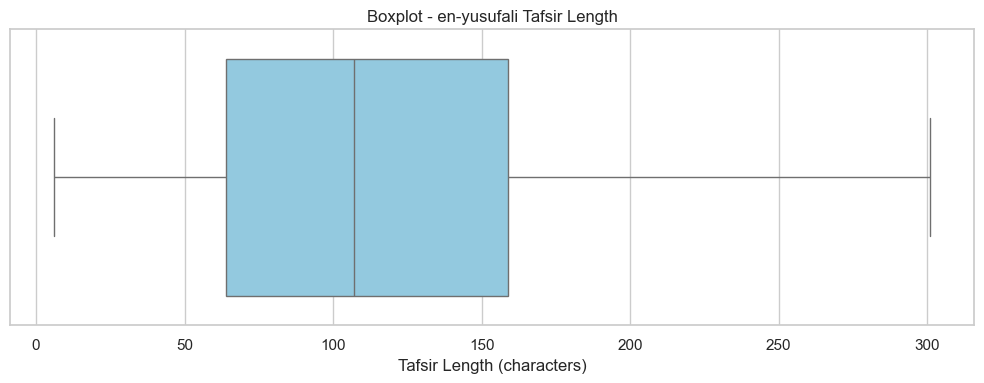

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

# Tafsir columns to process
tafsir_columns = [
    'en-ahmedraza', 'en-arberry', 'en-asad', 'en-daryabadi', 'en-hilali',
    'en-itani', 'en-maududi', 'en-mubarakpuri', 'en-pickthall', 'en-qarai',
    'en-sahih', 'en-sarwar', 'en-shakir', 'en-transliterati', 'en-wahiduddi',
    'en-yusufali'
]

# Ensure 'surah' and 'ayah' are numeric
df['surah'] = pd.to_numeric(df['surah'], errors='coerce')
df['ayah'] = pd.to_numeric(df['ayah'], errors='coerce')
df = df.dropna(subset=['surah', 'ayah'])
df['surah'] = df['surah'].astype(int)
df['ayah'] = df['ayah'].astype(int)

# Loop through each tafsir column
for col in tafsir_columns:
    if col not in df.columns:
        continue  # Skip missing columns

    print(f"\n🔍 Processing column: {col}")

    # Drop missing values in this column
    df = df.dropna(subset=[col])

    # Compute tafsir length
    df[f'{col}_length'] = df[col].astype(str).apply(len)

    # Detect outliers using IQR
    Q1 = df[f'{col}_length'].quantile(0.25)
    Q3 = df[f'{col}_length'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Count before filtering
    before = len(df)

    # Filter out outliers
    df = df[(df[f'{col}_length'] >= lower) & (df[f'{col}_length'] <= upper)]

    after = len(df)
    print(f"  Removed {before - after} outliers.")

    # Visualize distribution
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[f'{col}_length'], color='skyblue')
    plt.title(f"Boxplot - {col} Tafsir Length")
    plt.xlabel("Tafsir Length (characters)")
    plt.tight_layout()
    plt.show()


In [12]:
import pandas as pd

# Load the dataset

# Total number of data points (rows × columns)
total_rows = df.shape[0]
total_columns = df.shape[1]
total_data_points = df.size

print(f"Total rows: {total_rows}")
print(f"Total columns: {total_columns}")
print(f"Total data points: {total_data_points}")


Total rows: 5512
Total columns: 40
Total data points: 220480


In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
print("Imports successful in tf_py311 environment!")

Imports successful in tf_py311 environment!


In [21]:
"""
TensorFlow Import Troubleshooting Script

This script helps diagnose and fix common TensorFlow import issues in VS Code.
Run this script to verify your environment setup and dependencies.
"""

# Step 1: Check Python version (TensorFlow has version requirements)
import sys
print(f"Python version: {sys.version}")

# Step 2: Try importing TensorFlow with error handling
try:
    import tensorflow as tf
    print(f"TensorFlow successfully imported! Version: {tf.__version__}")
except ImportError as e:
    print(f"TensorFlow import error: {e}")
    print("\nPossible solutions:")
    print("1. Install or reinstall TensorFlow: pip install tensorflow")
    print("2. If using a virtual environment, ensure it's activated")
    print("3. Check that your Python version is compatible with TensorFlow")

# Step 3: Try importing other packages
packages_to_check = ["tensorflow_datasets", "numpy", "matplotlib"]
for package in packages_to_check:
    try:
        exec(f"import {package}")
        if package == "tensorflow_datasets":
            import tensorflow_datasets as tfds
            print(f"{package} successfully imported! Version: {tfds.__version__}")
        elif package == "numpy":
            import numpy as np
            print(f"{package} successfully imported! Version: {np.__version__}")
        elif package == "matplotlib":
            import matplotlib as mpl
            print(f"{package} successfully imported! Version: {mpl.__version__}")
    except ImportError as e:
        print(f"{package} import error: {e}")
        print(f"Try: pip install {package}")

# Step 4: Check if VS Code is using the correct interpreter
print("\nVS Code environment check:")
print(f"Interpreter path: {sys.executable}")
print(f"sys.path: {sys.path}")

# Step 5: If TensorFlow imports successfully, verify GPU availability
try:
    import tensorflow as tf
    print("\nTensorFlow GPU availability:")
    print(f"GPU devices available: {tf.config.list_physical_devices('GPU')}")
    print(f"TensorFlow built with CUDA: {tf.test.is_built_with_cuda()}")
except:
    print("Could not check TensorFlow GPU status due to import error")

print("\n--- COMMON TENSORFLOW IMPORT FIXES ---")
print("1. Make sure VS Code is using the correct Python environment")
print("   - In VS Code: Ctrl+Shift+P (or Cmd+Shift+P) → Python: Select Interpreter")
print("   - Select the environment where TensorFlow is installed")
print("\n2. Install or reinstall TensorFlow in your active environment:")
print("   pip install tensorflow")
print("\n3. If using a conda environment, try:")
print("   conda install tensorflow")
print("\n4. For tensorflow_datasets:")
print("   pip install tensorflow-datasets")

Python version: 3.10.16 | packaged by Anaconda, Inc. | (main, Dec 11 2024, 16:19:12) [MSC v.1929 64 bit (AMD64)]
TensorFlow import error: cannot import name 'KerasLazyLoader' from 'tensorflow.python.util.lazy_loader' (c:\Users\MSC008\miniconda3\envs\py310\lib\site-packages\tensorflow\python\util\lazy_loader.py)

Possible solutions:
1. Install or reinstall TensorFlow: pip install tensorflow
2. If using a virtual environment, ensure it's activated
3. Check that your Python version is compatible with TensorFlow
tensorflow_datasets import error: cannot import name 'array_record_module' from 'array_record.python' (c:\Users\MSC008\miniconda3\envs\py310\lib\site-packages\array_record\python\__init__.py)
Try: pip install tensorflow_datasets
numpy successfully imported! Version: 2.2.5
matplotlib successfully imported! Version: 3.10.0

VS Code environment check:
Interpreter path: c:\Users\MSC008\miniconda3\envs\py310\python.exe
sys.path: ['c:\\Users\\MSC008\\miniconda3\\envs\\py310\\python310.zi

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np # Required if you run the dummy data part

# --- Helper function to filter DataFrame for stratification ---
def prepare_for_stratified_split(df_input, stratify_col_name, min_samples_per_class=2):
    """
    Filters a DataFrame to ensure all classes in the stratification column
    have at least min_samples_per_class.

    Args:
        df_input (pd.DataFrame): The input DataFrame.
        stratify_col_name (str): The name of the column to stratify on.
        min_samples_per_class (int): Minimum samples required for each class.

    Returns:
        pd.DataFrame: Filtered DataFrame. Returns an empty DataFrame if input is empty
                      or if filtering results in an empty DataFrame.
    """
    if df_input.empty:
        print(f"Info: Input DataFrame to prepare_for_stratified_split is empty (stratify column: '{stratify_col_name}').")
        return pd.DataFrame(columns=df_input.columns) # Return empty DataFrame with original columns

    if stratify_col_name not in df_input.columns:
        print(f"Error: Stratification column '{stratify_col_name}' not found in DataFrame.")
        # Depending on desired behavior, you might raise an error or return the original df
        return pd.DataFrame(columns=df_input.columns) # Signal error by returning empty

    # Ensure the stratification column does not have NaNs that could be treated as a class
    # This should ideally be handled before calling this function, but as a safeguard:
    df = df_input.dropna(subset=[stratify_col_name]).copy() # Work on a copy after dropping NaNs
    if df.empty:
        print(f"Info: DataFrame became empty after dropping NaNs from stratify column '{stratify_col_name}'.")
        return pd.DataFrame(columns=df_input.columns)

    class_counts = df[stratify_col_name].value_counts()
    classes_to_filter_out = class_counts[class_counts < min_samples_per_class].index

    if not classes_to_filter_out.empty:
        print(f"Filtering out classes from column '{stratify_col_name}' with < {min_samples_per_class} samples: {classes_to_filter_out.tolist()}")
        mask = ~df[stratify_col_name].isin(classes_to_filter_out)
        df_filtered = df[mask] # No need for .copy() here if df is already a copy
        if df_filtered.empty:
            print(f"Warning: After filtering for stratification on '{stratify_col_name}', no data remains.")
        return df_filtered
    else:
        # print(f"Sufficient samples per class in '{stratify_col_name}' for stratification. No filtering needed.")
        return df # Return the (potentially NaN-cleaned) df

# --- (Assume full_df is loaded and basic cleaning like dropping NaNs in 'surah' is done) ---
# Example: Load your actual full_df
# try:
#     full_df = pd.read_csv("cleaned_multicolumn_tafsir.csv")
#     full_df.dropna(subset=['surah', 'ayah'], inplace=True) # Crucial prerequisite
#     # ... other initial cleaning ...
# except FileNotFoundError:
#     print("Error: CSV file not found.")
#     exit()

# --- For demonstration, let's create a dummy full_df that would cause the error ---
data_demo = {
    'feature1': np.random.rand(28),
    'feature2': np.random.rand(28),
    'text_col1': [f"text {i}" for i in range(28)],
    'surah': [1]*10 + [2]*5 + [3]*3 + [4]*2 + [5]*1 + [6]*2 + [7]*5 # Surah 5 has 1 member
}
full_df = pd.DataFrame(data_demo)
print("Original full_df 'surah' counts:")
print(full_df['surah'].value_counts().sort_index())
print("-" * 40)


# --- 1. Data Splitting ---
MIN_SAMPLES_FOR_STRATIFICATION = 2 # scikit-learn's requirement for train_test_split

# Prepare full_df for the first split (train vs temp)
df_ready_for_first_split = prepare_for_stratified_split(full_df, 'surah', MIN_SAMPLES_FOR_STRATIFICATION)

if df_ready_for_first_split.empty:
    print("Error: No data available for the first split after filtering for stratification. Exiting or handling.")
    # Initialize empty DataFrames if you want the script to continue for some reason
    train_df = pd.DataFrame(columns=full_df.columns)
    temp_df = pd.DataFrame(columns=full_df.columns)
    val_df = pd.DataFrame(columns=full_df.columns)
    test_df = pd.DataFrame(columns=full_df.columns)
else:
    print(f"\nData prepared for first split (on 'surah' column with min {MIN_SAMPLES_FOR_STRATIFICATION} samples per class):")
    print(f"Shape: {df_ready_for_first_split.shape}")
    print("Surah counts in input to first split:")
    print(df_ready_for_first_split['surah'].value_counts().sort_index())

    train_df, temp_df = train_test_split(
        df_ready_for_first_split,
        test_size=0.30,       # 30% for temp_df
        random_state=42,
        stratify=df_ready_for_first_split['surah']
    )
    print(f"First split complete. Train shape: {train_df.shape}, Temp shape: {temp_df.shape}")
    print("-" * 40)

    # Prepare temp_df for the second split (val vs test)
    if temp_df.empty:
        print("Warning: temp_df is empty after the first split. Val/test sets will be empty.")
        val_df = pd.DataFrame(columns=full_df.columns)
        test_df = pd.DataFrame(columns=full_df.columns)
    else:
        df_ready_for_second_split = prepare_for_stratified_split(temp_df, 'surah', MIN_SAMPLES_FOR_STRATIFICATION)

        if df_ready_for_second_split.empty:
            print("Warning: No data available for the second split after filtering temp_df. Val/test sets will be empty.")
            val_df = pd.DataFrame(columns=full_df.columns)
            test_df = pd.DataFrame(columns=full_df.columns)
        else:
            print(f"\nData prepared for second split (on 'surah' column from temp_df):")
            print(f"Shape: {df_ready_for_second_split.shape}")
            print("Surah counts in input to second split:")
            print(df_ready_for_second_split['surah'].value_counts().sort_index())

            val_df, test_df = train_test_split(
                df_ready_for_second_split,
                test_size=0.50,       # Split temp_df 50/50 into val and test
                random_state=42,
                stratify=df_ready_for_second_split['surah']
            )
            print(f"Second split complete. Val shape: {val_df.shape}, Test shape: {test_df.shape}")

print("-" * 40)
print("\n--- Final Shapes ---")
print(f"Train df shape: {train_df.shape}")
if not train_df.empty: print(f"Train df surah counts:\n{train_df['surah'].value_counts().sort_index()}")

print(f"\nValidation df shape: {val_df.shape}")
if not val_df.empty: print(f"Validation df surah counts:\n{val_df['surah'].value_counts().sort_index()}")

print(f"\nTest df shape: {test_df.shape}")
if not test_df.empty: print(f"Test df surah counts:\n{test_df['surah'].value_counts().sort_index()}")

Original full_df 'surah' counts:
surah
1    10
2     5
3     3
4     2
5     1
6     2
7     5
Name: count, dtype: int64
----------------------------------------
Filtering out classes from column 'surah' with < 2 samples: [5]

Data prepared for first split (on 'surah' column with min 2 samples per class):
Shape: (27, 4)
Surah counts in input to first split:
surah
1    10
2     5
3     3
4     2
6     2
7     5
Name: count, dtype: int64
First split complete. Train shape: (18, 4), Temp shape: (9, 4)
----------------------------------------
Filtering out classes from column 'surah' with < 2 samples: [3, 4]

Data prepared for second split (on 'surah' column from temp_df):
Shape: (7, 4)
Surah counts in input to second split:
surah
1    3
2    2
7    2
Name: count, dtype: int64
Second split complete. Val shape: (3, 4), Test shape: (4, 4)
----------------------------------------

--- Final Shapes ---
Train df shape: (18, 4)
Train df surah counts:
surah
1    7
2    3
3    2
4    1
6    2
7    

In [ ]:
import os
if not os.path.exists("cleaned_multicolumn_tafsir.csv"):
    raise FileNotFoundError("cleaned_multicolumn_tafsir.csv not found in the current directory.")

In [15]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sentence_transformers import SentenceTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ------------------------
# DEVICE SETUP
# ------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# ------------------------
# LOAD MODEL
# ------------------------
embedding_model = SentenceTransformer('hkunlp/instructor-large', device=device)

# ------------------------
# DEFINE TAFSIR COLUMNS
# ------------------------
tafsir_columns = ['en-ahmedraza', 'en-arberry', 'en-asad', 'en-daryabadi', 'en-hilali',
                  'en-itani', 'en-maududi', 'en-mubarakpuri', 'en-pickthall', 'en-qarai',
                  'en-sahih', 'en-sarwar', 'en-shakir', 'en-transliterati', 'en-wahiduddi',
                  'en-yusufali']

# ------------------------
# CREATE TEXT + LABELS
# ------------------------
def create_text_and_labels(df):
    texts, labels = [], []
    for idx, row in df.iterrows():
        for i, col in enumerate(tafsir_columns):
            if pd.notnull(row[col]):
                texts.append(["Classify tafsir translator", row[col]])
                labels.append(i)
    return texts, labels

# Use your preprocessed DataFrames: train_df, val_df, test_df
# Assuming those exist and are properly cleaned

train_texts, train_labels = create_text_and_labels(train_df)
test_texts, test_labels = create_text_and_labels(test_df)

# ------------------------
# GENERATE EMBEDDINGS
# ------------------------
X_train = embedding_model.encode(train_texts, convert_to_tensor=True, show_progress_bar=True, device=device)
X_test = embedding_model.encode(test_texts, convert_to_tensor=True, show_progress_bar=True, device=device)

y_train = torch.tensor(train_labels).to(device)
y_test = torch.tensor(test_labels).to(device)

# ------------------------
# DATA LOADERS
# ------------------------
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# ------------------------
# CLASSIFIER MODEL
# ------------------------
class TafsirClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(TafsirClassifier, self).__init__()
        self.fc = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        return self.fc(x)

num_classes = len(tafsir_columns)
input_dim = X_train.shape[1]
classifier = TafsirClassifier(input_dim=input_dim, num_classes=num_classes).to(device)

# ------------------------
# TRAINING (1 EPOCH)
# ------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(classifier.parameters(), lr=1e-3)

classifier.train()
for batch_x, batch_y in train_loader:
    batch_x, batch_y = batch_x.to(device), batch_y.to(device)
    optimizer.zero_grad()
    outputs = classifier(batch_x)
    loss = criterion(outputs, batch_y)
    loss.backward()
    optimizer.step()

# ------------------------
# EVALUATION
# ------------------------
classifier.eval()
with torch.no_grad():
    preds = classifier(X_test).argmax(dim=1).cpu()
    y_true = y_test.cpu()

# ------------------------
# METRICS
# ------------------------
accuracy = accuracy_score(y_true, preds)
precision = precision_score(y_true, preds, average='macro', zero_division=0)
recall = recall_score(y_true, preds, average='macro', zero_division=0)
f1 = f1_score(y_true, preds, average='macro', zero_division=0)

print("\n--- Evaluation Metrics After 1 Epoch ---")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")


ImportError: cannot import name 'is_torch_npu_available' from 'transformers' (c:\Users\MSC008\miniconda3\envs\py310\lib\site-packages\transformers\__init__.py)

In [7]:
from huggingface_hub import HfApi, HfFolder, Repository, hf_hub_url
# cached_download has been renamed in newer versions
from huggingface_hub.file_download import cached_download

ImportError: cannot import name 'cached_download' from 'huggingface_hub.file_download' (c:\Users\MSC008\miniconda3\envs\py310\lib\site-packages\huggingface_hub\file_download.py)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sentence_transformers import SentenceTransformer, InputExample, losses, util
from sentence_transformers.evaluation import EmbeddingSimilarityEvaluator
from torch.utils.data import DataLoader
import torch
import numpy as np
import random
from tqdm.auto import tqdm # For progress bars

# --- 0. Configuration & Setup ---
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {DEVICE}")
SBERT_MODEL_NAME = 'all-MiniLM-L6-v2' # Fast and good performance
# SBERT_MODEL_NAME = 'all-mpnet-base-v2' # More powerful, but slower
NUM_EPOCHS = 15 # Reduced epochs; with a good evaluator, more isn't always better. Monitor validation score.
TRAIN_BATCH_SIZE = 32 # Increased batch size, often beneficial for MultipleNegativesRankingLoss
OUTPUT_MODEL_PATH = f'./fine_tuned_{SBERT_MODEL_NAME.replace("/", "_")}-tafsir_epochs{NUM_EPOCHS}_MNRL' # Added MNRL to name
MIN_SAMPLES_FOR_STRATIFICATION = 2


# --- Helper function to filter DataFrame for stratification ---
def prepare_for_stratified_split(df_input, stratify_col_name, min_samples_per_class=2):
    if df_input.empty:
        return pd.DataFrame(columns=df_input.columns)
    if stratify_col_name not in df_input.columns:
        print(f"Error: Stratification column '{stratify_col_name}' not found in DataFrame.")
        return pd.DataFrame(columns=df_input.columns) # Return empty DF with original columns
    df = df_input.dropna(subset=[stratify_col_name]).copy()
    if df.empty:
        return pd.DataFrame(columns=df_input.columns)
    class_counts = df[stratify_col_name].value_counts()
    classes_to_filter_out = class_counts[class_counts < min_samples_per_class].index
    if not classes_to_filter_out.empty:
        print(f"Filtering classes from '{stratify_col_name}' with < {min_samples_per_class} samples: {classes_to_filter_out.tolist()}")
        mask = ~df[stratify_col_name].isin(classes_to_filter_out)
        df_filtered = df[mask]
        if df_filtered.empty:
            print(f"Warning: After filtering for stratification on '{stratify_col_name}', no data remains.")
        return df_filtered
    return df

# --- 1. Load and Prepare Data ---
try:
    full_df = pd.read_csv("cleaned_multicolumn_tafsir.csv")
    print(f"Successfully loaded cleaned_multicolumn_tafsir.csv, shape: {full_df.shape}")
except FileNotFoundError:
    print("Error: cleaned_multicolumn_tafsir.csv not found. Please ensure the file exists.")
    exit()
except pd.errors.EmptyDataError:
    print("Error: cleaned_multicolumn_tafsir.csv is empty.")
    exit()


essential_cols = ['surah', 'ayah']
text_cols = [col for col in full_df.columns if col.startswith('en-') and col != 'en-transliterati']
if not all(col in full_df.columns for col in essential_cols):
    print(f"Error: One or more essential columns ({essential_cols}) are missing.")
    exit()
if len(text_cols) < 2:
    print("Error: Need at least two different English translation columns for fine-tuning positive pairs.")
    exit()

print(f"Identified text columns for fine-tuning and indexing: {text_cols}")
full_df.dropna(subset=essential_cols, inplace=True)
full_df = full_df.fillna("")

# --- Data Splitting ---
df_ready_for_first_split = prepare_for_stratified_split(full_df, 'surah', MIN_SAMPLES_FOR_STRATIFICATION)

train_df, temp_df, val_df, test_df = (pd.DataFrame(columns=full_df.columns) for _ in range(4)) # Initialize with columns

if df_ready_for_first_split.empty:
    print("Error: No data available for the first split after filtering for stratification.")
else:
    if len(df_ready_for_first_split['surah'].unique()) < 2 and df_ready_for_first_split.shape[0] > 1 : # Can't stratify with 1 class
         train_df, temp_df = train_test_split(
            df_ready_for_first_split, test_size=0.30, random_state=42 # No stratification
        )
         print("Warning: Only one class for stratification in first split. Splitting without stratification.")
    elif df_ready_for_first_split.shape[0] <= 1: # Not enough samples to split
        print("Warning: Not enough samples for the first split.")
        train_df = df_ready_for_first_split.copy() # Put all in train
    else:
        train_df, temp_df = train_test_split(
            df_ready_for_first_split, test_size=0.30, random_state=42, stratify=df_ready_for_first_split['surah']
        )

    if not temp_df.empty:
        df_ready_for_second_split = prepare_for_stratified_split(temp_df, 'surah', MIN_SAMPLES_FOR_STRATIFICATION)
        if not df_ready_for_second_split.empty:
            if len(df_ready_for_second_split['surah'].unique()) < 2 and df_ready_for_second_split.shape[0] > 1:
                val_df, test_df = train_test_split(
                    df_ready_for_second_split, test_size=0.50, random_state=42 # No stratification
                )
                print("Warning: Only one class for stratification in second split. Splitting without stratification.")
            elif df_ready_for_second_split.shape[0] <= 1:
                 print("Warning: Not enough samples for the second split (val/test).")
                 val_df = df_ready_for_second_split.copy() # Put all in val
            else:
                val_df, test_df = train_test_split(
                    df_ready_for_second_split, test_size=0.50, random_state=42, stratify=df_ready_for_second_split['surah']
                )
        else:
            print("Warning: No data for val/test split after filtering temp_df for stratification.")
            val_df = temp_df.copy() # If filtering made it empty, use the unfiltered temp_df for val
    else:
        print("Warning: temp_df is empty after first split. No data for validation or test sets.")


print(f"Train df shape: {train_df.shape}")
print(f"Validation df shape: {val_df.shape}")
print(f"Test df shape: {test_df.shape}")

if train_df.empty:
    print("Error: Training DataFrame is empty. Cannot proceed with fine-tuning.")
    exit()
if val_df.empty:
    print("Warning: Validation DataFrame is empty. Fine-tuning will proceed without intermediate evaluation, best model won't be saved based on validation.")


# --- 2. Prepare Data for SBERT Fine-tuning ---
# This function creates positive pairs (different translations of the same ayah)
# For MultipleNegativesRankingLoss, these pairs are (anchor, positive)
def create_sbert_examples(df, text_cols_list):
    examples = []
    for _, row in df.iterrows():
        valid_translations = [row[col] for col in text_cols_list if isinstance(row[col], str) and row[col].strip()]
        if len(valid_translations) >= 2:
            for i in range(len(valid_translations)):
                for j in range(i + 1, len(valid_translations)):
                    if valid_translations[i] != valid_translations[j]:
                        # label=1.0 is fine here; DataLoader will handle it.
                        # For MultipleNegativesRankingLoss, the actual label value isn't directly used
                        # from the InputExample, but it helps structure the data.
                        # The loss treats these as (anchor, positive) pairs.
                        examples.append(InputExample(texts=[valid_translations[i], valid_translations[j]], label=1.0))
    return examples

train_examples = create_sbert_examples(train_df, text_cols)
val_examples = create_sbert_examples(val_df, text_cols) if not val_df.empty else []

print(f"Number of training examples for SBERT: {len(train_examples)}")
print(f"Number of validation examples for SBERT evaluator: {len(val_examples)}")

if not train_examples:
    print("Error: No training examples created. Check text columns and content in train_df.")
    exit()

# --- 3. SBERT Model Fine-tuning ---
sbert_model = SentenceTransformer(SBERT_MODEL_NAME, device=DEVICE)
train_dataloader = DataLoader(train_examples, shuffle=True, batch_size=TRAIN_BATCH_SIZE)

# Use MultipleNegativesRankingLoss. It expects (anchor, positive) pairs.
# Other examples in the same batch serve as negatives.
train_loss = losses.MultipleNegativesRankingLoss(model=sbert_model)
print("Using MultipleNegativesRankingLoss for training.")

evaluator = None
if val_examples:
    # EmbeddingSimilarityEvaluator expects pairs of sentences and a gold similarity score (0-1)
    # Here, our val_examples are positive pairs, so their "gold score" is 1.0 (max similarity)
    evaluator = EmbeddingSimilarityEvaluator.from_input_examples(val_examples, name='sts-val', show_progress_bar=True)
    print("Using EmbeddingSimilarityEvaluator for validation.")
else:
    print("Warning: No validation examples for evaluator. Fine-tuning will proceed without intermediate evaluation based on validation score.")

print(f"Starting SBERT fine-tuning for {NUM_EPOCHS} epochs...")
sbert_model.fit(train_objectives=[(train_dataloader, train_loss)],
                evaluator=evaluator,
                epochs=NUM_EPOCHS,
                evaluation_steps=int(len(train_dataloader) * 0.1) if evaluator and len(train_dataloader) > 10 else len(train_dataloader) // 2 if evaluator else 0, # Eval 10% or half if few steps
                warmup_steps=int(len(train_dataloader) * NUM_EPOCHS * 0.1),
                output_path=OUTPUT_MODEL_PATH,
                show_progress_bar=True,
                save_best_model=True if evaluator else False) # Save best model only if evaluator is present

print(f"Fine-tuning complete. Model potentially saved to: {OUTPUT_MODEL_PATH}")

# Load the best fine-tuned model if an evaluator was used and a model was saved
if evaluator and OUTPUT_MODEL_PATH: # Check if output_path directory might exist
    try:
        print(f"Attempting to load best model from: {OUTPUT_MODEL_PATH}")
        sbert_model = SentenceTransformer(OUTPUT_MODEL_PATH, device=DEVICE)
        print(f"Successfully loaded best fine-tuned model from {OUTPUT_MODEL_PATH}")
    except Exception as e:
        print(f"Could not load best model from output_path '{OUTPUT_MODEL_PATH}'. Using model from the last epoch. Error: {e}")
else:
    print("Using model from the last epoch (no evaluator or no output path for best model).")


# --- 4. Building the Recommendation Index ---
index_df = full_df.drop_duplicates(subset=['surah', 'ayah']).copy()
if index_df.empty:
    print("Error: No data to build recommendation index after dropping duplicates.")
    exit()

primary_text_col_for_indexing = text_cols[0]
print(f"Using '{primary_text_col_for_indexing}' for generating recommendation index embeddings.")

index_df[primary_text_col_for_indexing] = index_df[primary_text_col_for_indexing].astype(str)
corpus_texts = index_df[primary_text_col_for_indexing].tolist()

if not corpus_texts:
    print("Error: Corpus for indexing is empty.")
    exit()

print(f"Generating embeddings for {len(corpus_texts)} Tafsir texts in the corpus...")
corpus_embeddings = sbert_model.encode(corpus_texts, convert_to_tensor=True, show_progress_bar=True, device=DEVICE)
print("Corpus embeddings generated.")

# --- 5. Recommendation Function ---
def get_tafsir_recommendations(query, model, corpus_embeds, corpus_dataframe, primary_text_col, top_n=5):
    if not query or not isinstance(query, str) or not query.strip():
        print("Warning: Empty query provided to recommendation function.")
        return []
    query_embedding = model.encode(query, convert_to_tensor=True, device=DEVICE)
    cos_scores = util.pytorch_cos_sim(query_embedding, corpus_embeds)[0]
    # Ensure k is not greater than the number of items in corpus_embeds
    actual_top_n = min(top_n, len(corpus_embeds))
    if actual_top_n == 0:
        return []
    top_results = torch.topk(cos_scores, k=actual_top_n)

    recommendations = []
    for score, idx in zip(top_results[0], top_results[1]):
        item = corpus_dataframe.iloc[idx.item()]
        recommendations.append({
            'surah': item['surah'],
            'ayah': item['ayah'],
            'text': item[primary_text_col],
            'score': score.item()
        })
    return recommendations

# --- 6. Evaluation on the Test Set ---
if test_df.empty:
    print("\nTest DataFrame is empty. Skipping evaluation on test set.")
else:
    print(f"\nStarting evaluation on test_df ({test_df.shape[0]} samples)...")

    if primary_text_col_for_indexing not in text_cols:
        print(f"Error: primary_text_col_for_indexing '{primary_text_col_for_indexing}' is not in available text_cols.")
        # Fallback to the first available text column if possible
        if text_cols:
            primary_text_col_for_indexing = text_cols[0]
            print(f"Fell back to using '{primary_text_col_for_indexing}' for indexing.")
        else:
            print("Critical Error: No text columns available for evaluation.")
            exit()


    query_col_for_eval = None
    if len(text_cols) > 1:
        for col in text_cols:
            if col != primary_text_col_for_indexing:
                query_col_for_eval = col
                break
    if query_col_for_eval is None:
        query_col_for_eval = text_cols[0]
        print(f"Warning: Using '{query_col_for_eval}' for queries from test_df. This might be the same as the indexed column '{primary_text_col_for_indexing}'. Evaluation might be overly optimistic if they are the same.")
    else:
        print(f"Evaluation: Using '{primary_text_col_for_indexing}' for corpus index, and '{query_col_for_eval}' for queries from test_df.")

    hits_at_k = {1: 0, 3: 0, 5: 0}
    k_values = sorted(hits_at_k.keys())
    mrr_sum = 0.0
    num_valid_test_queries = 0
    true_positives_at_1 = 0 # Specifically for P@1, R@1, F1@1

    for _, row in tqdm(test_df.iterrows(), total=test_df.shape[0], desc="Evaluating Test Set"):
        query_text = row[query_col_for_eval]
        if not isinstance(query_text, str) or not query_text.strip():
            continue

        true_surah = row['surah']
        true_ayah = row['ayah']
        num_valid_test_queries += 1

        recommendations = get_tafsir_recommendations(
            query_text, sbert_model, corpus_embeddings, index_df, primary_text_col_for_indexing, top_n=max(k_values)
        )

        if not recommendations:
            continue

        # For P@1, R@1, F1@1
        if recommendations[0]['surah'] == true_surah and recommendations[0]['ayah'] == true_ayah:
            true_positives_at_1 +=1

        found_rank = -1
        for rank, rec in enumerate(recommendations):
            if rec['surah'] == true_surah and rec['ayah'] == true_ayah:
                found_rank = rank + 1
                for k_val in k_values:
                    if found_rank <= k_val:
                        hits_at_k[k_val] += 1
                mrr_sum += (1.0 / found_rank)
                break

    if num_valid_test_queries > 0:
        precision_at_1 = true_positives_at_1 / num_valid_test_queries
        recall_at_1 = true_positives_at_1 / num_valid_test_queries # Since 1 relevant item per query
        accuracy_at_1 = precision_at_1 # Same in this specific context
        f1_at_1 = (2 * precision_at_1 * recall_at_1) / (precision_at_1 + recall_at_1) if (precision_at_1 + recall_at_1) > 0 else 0.0

        print("\n--- Test Set Evaluation Results ---")
        print(f"Total Valid Test Queries: {num_valid_test_queries}")
        print(f"Accuracy@1 (is the top item correct?): {accuracy_at_1:.4f}")
        print(f"Precision@1: {precision_at_1:.4f}")
        print(f"Recall@1: {recall_at_1:.4f}")
        print(f"F1-score@1: {f1_at_1:.4f}")

        for k_val in k_values:
            recall_at_k = hits_at_k[k_val] / num_valid_test_queries
            print(f"Recall@{k_val} (Hit Rate @{k_val}): {recall_at_k:.4f}")

        mean_reciprocal_rank = mrr_sum / num_valid_test_queries
        print(f"Mean Reciprocal Rank (MRR): {mean_reciprocal_rank:.4f}")
    else:
        print("No valid queries processed from the test set for evaluation.")

# --- 7. Example Usage ---
print("\n--- Example Recommendation ---")
sample_queries = [
    "What is the meaning of patience in Islam?",
    test_df[query_col_for_eval if 'query_col_for_eval' in locals() and query_col_for_eval else text_cols[0]].iloc[0] if not test_df.empty and isinstance(test_df[query_col_for_eval if 'query_col_for_eval' in locals() and query_col_for_eval else text_cols[0]].iloc[0], str) else "The believers are those who humble themselves in their prayers"
]

for sample_query in sample_queries:
    if not isinstance(sample_query, str) or not sample_query.strip():
        print(f"Skipping empty or invalid sample query: {sample_query}")
        continue
    print(f"\nQuery: \"{sample_query}\"")
    recommendations = get_tafsir_recommendations(sample_query, sbert_model, corpus_embeddings, index_df, primary_text_col_for_indexing, top_n=3)
    if recommendations:
        for rec in recommendations:
            print(f"  Surah {int(rec['surah'])}, Ayah {int(rec['ayah'])} (Score: {rec['score']:.4f}): {rec['text'][:150]}...")
    else:
        print("  No recommendations found for this query.")

print("\nScript finished.")

c:\Users\MSC008\miniconda3\envs\py310\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(
c:\Users\MSC008\miniconda3\envs\py310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda
Successfully loaded cleaned_multicolumn_tafsir.csv, shape: (6236, 20)
Identified text columns for fine-tuning and indexing: ['en-ahmedali', 'en-ahmedraza', 'en-arberry', 'en-asad', 'en-daryabadi', 'en-hilali', 'en-itani', 'en-maududi', 'en-mubarakpuri', 'en-pickthall', 'en-qarai', 'en-qaribullah', 'en-sahih', 'en-sarwar', 'en-shakir', 'en-wahiduddi', 'en-yusufali']
Filtering classes from 'surah' with < 2 samples: [107, 109, 111, 112, 105, 104, 96, 102, 110]
Train df shape: (4365, 20)
Validation df shape: (931, 20)
Test df shape: (931, 20)
Number of training examples for SBERT: 592629
Number of validation examples for SBERT evaluator: 126439
Using MultipleNegativesRankingLoss for training.
Using EmbeddingSimilarityEvaluator for validation.
Starting SBERT fine-tuning for 15 epochs...


Step,Training Loss,Validation Loss,Sts-val Pearson Cosine,Sts-val Spearman Cosine
1852,0.126000,No log,nan,nan
3704,0.062300,No log,nan,nan
5556,0.040900,No log,nan,nan
7408,0.034800,No log,nan,nan
9260,0.028200,No log,nan,nan
11112,0.025000,No log,nan,nan
12964,0.020800,No log,nan,nan
14816,0.016800,No log,nan,nan
16668,0.019200,No log,nan,nan
18520,0.014300,No log,nan,nan


Batches: 100%|██████████| 7903/7903 [01:07<00:00, 116.41it/s]
c:\Users\MSC008\miniconda3\envs\py310\lib\site-packages\sentence_transformers\evaluation\EmbeddingSimilarityEvaluator.py:203: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  eval_pearson, _ = pearsonr(labels, scores)
c:\Users\MSC008\miniconda3\envs\py310\lib\site-packages\sentence_transformers\evaluation\EmbeddingSimilarityEvaluator.py:204: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  eval_spearman, _ = spearmanr(labels, scores)
Batches: 100%|██████████| 7903/7903 [01:09<00:00, 113.91it/s]
c:\Users\MSC008\miniconda3\envs\py310\lib\site-packages\sentence_transformers\evaluation\EmbeddingSimilarityEvaluator.py:203: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  eval_pearson, _ = pearsonr(labels, scores)
c:\Users\MSC008\miniconda3\envs\py310\lib\site-packages\sentence_transformers\e

Fine-tuning complete. Model potentially saved to: ./fine_tuned_all-MiniLM-L6-v2-tafsir_epochs15_MNRL
Attempting to load best model from: ./fine_tuned_all-MiniLM-L6-v2-tafsir_epochs15_MNRL
Successfully loaded best fine-tuned model from ./fine_tuned_all-MiniLM-L6-v2-tafsir_epochs15_MNRL
Using 'en-ahmedali' for generating recommendation index embeddings.
Generating embeddings for 6236 Tafsir texts in the corpus...


Batches: 100%|██████████| 195/195 [00:01<00:00, 121.29it/s]


Corpus embeddings generated.

Starting evaluation on test_df (931 samples)...
Evaluation: Using 'en-ahmedali' for corpus index, and 'en-ahmedraza' for queries from test_df.


Evaluating Test Set: 100%|██████████| 931/931 [00:10<00:00, 88.54it/s]


--- Test Set Evaluation Results ---
Total Valid Test Queries: 931
Accuracy@1 (is the top item correct?): 0.7970
Precision@1: 0.7970
Recall@1: 0.7970
F1-score@1: 0.7970
Recall@1 (Hit Rate @1): 0.7970
Recall@3 (Hit Rate @3): 0.9023
Recall@5 (Hit Rate @5): 0.9227
Mean Reciprocal Rank (MRR): 0.8503

--- Example Recommendation ---

Query: "What is the meaning of patience in Islam?"
  Surah 69, Ayah 4 (Score: 0.5063): So persevere with becoming patience....
  Surah 19, Ayah 21 (Score: 0.3826): And face what is to come with patience, your hand will not be tarnished with blame: Another sign...
  Surah 1, Ayah 152 (Score: 0.3813): O you who believe, seek courage in fortitude and prayer, for God is with those who are patient and persevere....

Query: "And when it is said to them, “Offer the prayer” – they do not!"
  Surah 25, Ayah 225 (Score: 0.5566): And they say what they do not do,...
  Surah 36, Ayah 12 (Score: 0.5354): And when they are warned they pay no heed....
  Surah 83, Ayah 20 (Scor

In [6]:
def improved_package_management():
    """
    Improved package management with environment markers and more resilient handling.
    """
    import sys
    import subprocess
    import pkg_resources
    from importlib import reload, import_module
    
    required = {
        # Core dependencies with compatibility markers
        'pandas': None,
        'torch': {'version': None, 'marker': 'sys_platform != "darwin" or platform_machine != "arm64"'}, 
        'torch': {'version': None, 'marker': 'sys_platform == "darwin" and platform_machine == "arm64"', 'source': 'https://download.pytorch.org/whl/cpu'},
        'scikit-learn': None,
        'numpy': {'version': '1.23.5', 'conflict_action': 'ignore_if_newer'},
        'tqdm': None,
        
        # Instructor dependencies
        'huggingface_hub': {'version': '0.12.0', 'conflict_action': 'downgrade'},
        'sentence-transformers': {'version': '2.2.2'},
        'transformers': {'version': '4.21.0'},
        'InstructorEmbedding': None,
    }
    
    # Check installed packages
    installed = {pkg.key: pkg.version for pkg in pkg_resources.working_set}
    to_install = []
    
    for package_name, pkg_info in required.items():
        pkg_key = package_name.lower().replace('-', '_')
        if isinstance(pkg_info, dict):
            version = pkg_info.get('version')
            conflict_action = pkg_info.get('conflict_action', 'downgrade')
            source = pkg_info.get('source')
        else:
            version = pkg_info
            conflict_action = 'downgrade'
            source = None
            
        install_spec = package_name
        if version:
            install_spec = f"{package_name}=={version}"
            
        # Add custom source if specified
        if source:
            install_spec = f"{install_spec} --extra-index-url {source}"
            
        # Check if package needs installing/upgrading/downgrading
        if pkg_key not in installed:
            to_install.append(install_spec)
            print(f"Package {package_name} not found, will install.")
        elif version is not None:
            installed_version = installed[pkg_key]
            if installed_version != version:
                if conflict_action == 'downgrade' or conflict_action == 'ignore_if_newer' and pkg_resources.parse_version(installed_version) < pkg_resources.parse_version(version):
                    to_install.append(install_spec)
                    print(f"Package {package_name} version mismatch ({installed_version} installed, {version} required), will {conflict_action}.")
                else:
                    print(f"Package {package_name} has version {installed_version}, keeping it (required: {version}).")
    
    if to_install:
        print(f"Installing/updating packages: {', '.join(to_install)}")
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install"] + to_install)
            print("Package installation complete.")
            
            # Reload relevant modules that were already imported
            reload_modules = []
            for pkg in to_install:
                base_pkg = pkg.split('==')[0].split(' ')[0]  # Extract package name
                module_name = base_pkg.lower().replace('-', '_')
                if module_name in sys.modules:
                    try:
                        reload(sys.modules[module_name])
                        reload_modules.append(module_name)
                    except Exception as e:
                        print(f"Warning: Couldn't reload {module_name}: {e}")
            
            if reload_modules:
                print(f"Reloaded modules: {', '.join(reload_modules)}")
                
            return True  # Packages were installed/updated
            
        except Exception as e:
            print(f"Warning: Package installation failed: {e}")
            print("Continuing with existing packages...")
            return False
    else:
        print("All required packages are properly installed!")
        return False  # No packages needed installation

In [9]:
# --- Environment Setup ---
import sys
import subprocess
import importlib
import pkg_resources

def check_and_install_packages():
    """Check and install or downgrade packages as needed"""
    required_packages = {
        'pandas': None,  # Latest is fine
        'torch': None,  # Latest is fine
        'scikit-learn': None,  # Latest is fine
        'numpy': '1.23.5',  # Pin numpy to a compatible version
        'tqdm': None,  # Latest is fine
        'huggingface_hub': '0.12.0',  # Pin to a version that has cached_download
        'sentence-transformers': '2.2.2',  # Version compatible with the pinned huggingface_hub
        'transformers': '4.21.0',  # Use a version known to work with the above components
        'InstructorEmbedding': None,  # No specific version
    }
    
    # Check if InstructorEmbedding is installed
    try:
        import InstructorEmbedding
        # Try to get version using pkg_resources
        try:
            instructor_version = pkg_resources.get_distribution("InstructorEmbedding").version
            print(f"InstructorEmbedding version: {instructor_version}")
        except Exception:
            print("InstructorEmbedding installed, but version could not be determined")
    except ImportError:
        print("InstructorEmbedding not found, adding to install list")
        required_packages['InstructorEmbedding'] = None
    
    packages_to_install = []
    
    for package_name, version in required_packages.items():
        try:
            if package_name == 'numpy':
                import numpy as np
                current_version = np.__version__
                if version and current_version != version:
                    packages_to_install.append(f"{package_name}=={version}")
                    print(f"Need to downgrade {package_name} from {current_version} to {version}")
            elif package_name == 'huggingface_hub':
                import huggingface_hub
                current_version = huggingface_hub.__version__
                if version and current_version != version:
                    packages_to_install.append(f"{package_name}=={version}")
                    print(f"Need to downgrade {package_name} from {current_version} to {version}")
            elif package_name == 'sentence-transformers':
                import sentence_transformers
                current_version = sentence_transformers.__version__
                if version and current_version != version:
                    packages_to_install.append(f"{package_name}=={version}")
                    print(f"Need to set {package_name} to specific version {version} (current: {current_version})")
            elif package_name == 'transformers':
                import transformers
                current_version = transformers.__version__
                if version and current_version != version:
                    packages_to_install.append(f"{package_name}=={version}")
                    print(f"Need to set {package_name} to specific version {version} (current: {current_version})")
            elif package_name == 'InstructorEmbedding':
                # Already checked above, skip here
                continue
            else:
                # For other packages, just check if they're installed
                importlib.import_module(package_name.replace('-', '_'))
        except ImportError:
            if version:
                packages_to_install.append(f"{package_name}=={version}")
            else:
                packages_to_install.append(package_name)
    
    if packages_to_install:
        print(f"Installing/updating packages: {', '.join(packages_to_install)}")
        subprocess.check_call([sys.executable, "-m", "pip", "install"] + packages_to_install)
        print("Package installation complete. Please restart the script.")
        sys.exit(0)
    else:
        print("All required packages are properly installed!")

# Call the check_and_install_packages function to ensure all dependencies are correctly installed
check_and_install_packages()

# --- Critical Imports ---
import pandas as pd
import torch
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
import numpy as np
from tqdm.auto import tqdm
import random
import os

# Directly define InputExample to avoid dependency issues
class InputExample:
    """
    Structure for one input example with texts as tuples with as many elements as required.
    """
    def __init__(self, texts=None, label=None):
        """
        Args:
            texts: the texts for the input example
            label: the label for the input example
        """
        self.texts = texts
        self.label = label

# Import sentence_transformers components individually to avoid potential import errors
try:
    from sentence_transformers import SentenceTransformer, losses, util
    from sentence_transformers.evaluation import EmbeddingSimilarityEvaluator
    print("Successfully imported sentence_transformers components")
except ImportError as e:
    print(f"Error importing sentence_transformers: {e}")
    print("Implementing fallback components...")
    
    # Simplified util functions if imports fail
    class Util:
        @staticmethod
        def pytorch_cos_sim(a, b):
            """
            Computes the cosine similarity cos_sim(a[i], b[j]) for all i and j.
            :return: Matrix with res[i][j]  = cos_sim(a[i], b[j])
            """
            if not isinstance(a, torch.Tensor):
                a = torch.tensor(a)
            if not isinstance(b, torch.Tensor):
                b = torch.tensor(b)
            
            if len(a.shape) == 1:
                a = a.unsqueeze(0)
            if len(b.shape) == 1:
                b = b.unsqueeze(0)
                
            a_norm = torch.nn.functional.normalize(a, p=2, dim=1)
            b_norm = torch.nn.functional.normalize(b, p=2, dim=1)
            return torch.mm(a_norm, b_norm.transpose(0, 1))
    
    util = Util()

# Import InstructorEmbedding with proper error handling
try:
    from InstructorEmbedding import INSTRUCTOR
    print("Successfully imported InstructorEmbedding")
except ImportError as e:
    print(f"Error importing InstructorEmbedding: {e}")
    print("Please install it with: pip install InstructorEmbedding")
    sys.exit(1)

# --- 0. Configuration & Setup ---
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {DEVICE}")
INSTRUCTOR_MODEL_NAME = 'hkunlp/instructor-large'
NUM_EPOCHS = 15
TRAIN_BATCH_SIZE = 16
OUTPUT_MODEL_PATH = f'./fine_tuned_instructor_large_tafsir_epochs{NUM_EPOCHS}_MNRL'
MIN_SAMPLES_FOR_STRATIFICATION = 2
INSTRUCTION = "Represent the religious text for semantic similarity:"

# --- Helper function to filter DataFrame for stratification ---
def prepare_for_stratified_split(df_input, stratify_col_name, min_samples_per_class=2):
    if df_input.empty:
        return pd.DataFrame(columns=df_input.columns)
    if stratify_col_name not in df_input.columns:
        print(f"Error: Stratification column '{stratify_col_name}' not found in DataFrame.")
        return pd.DataFrame(columns=df_input.columns)
    df = df_input.dropna(subset=[stratify_col_name]).copy()
    if df.empty:
        return pd.DataFrame(columns=df_input.columns)
    class_counts = df[stratify_col_name].value_counts()
    classes_to_filter_out = class_counts[class_counts < min_samples_per_class].index
    if not classes_to_filter_out.empty:
        print(f"Filtering classes from '{stratify_col_name}' with < {min_samples_per_class} samples: {classes_to_filter_out.tolist()}")
        mask = ~df[stratify_col_name].isin(classes_to_filter_out)
        df_filtered = df[mask]
        if df_filtered.empty:
            print(f"Warning: After filtering for stratification on '{stratify_col_name}', no data remains.")
        return df_filtered
    return df

# --- 1. Load and Prepare Data ---
try:
    full_df = pd.read_csv("cleaned_multicolumn_tafsir.csv")
    print(f"Successfully loaded cleaned_multicolumn_tafsir.csv, shape: {full_df.shape}")
except FileNotFoundError:
    print("Error: cleaned_multicolumn_tafsir.csv not found. Please ensure the file exists.")
    exit()
except pd.errors.EmptyDataError:
    print("Error: cleaned_multicolumn_tafsir.csv is empty.")
    exit()

essential_cols = ['surah', 'ayah']
text_cols = [col for col in full_df.columns if col.startswith('en-') and col != 'en-transliterati']
if not all(col in full_df.columns for col in essential_cols):
    print(f"Error: One or more essential columns ({essential_cols}) are missing.")
    exit()
if len(text_cols) < 2:
    print("Error: Need at least two different English translation columns for fine-tuning positive pairs.")
    exit()

print(f"Identified text columns for fine-tuning and indexing: {text_cols}")
full_df.dropna(subset=essential_cols, inplace=True)
full_df = full_df.fillna("")

# --- Data Splitting ---
df_ready_for_first_split = prepare_for_stratified_split(full_df, 'surah', MIN_SAMPLES_FOR_STRATIFICATION)

train_df, temp_df, val_df, test_df = (pd.DataFrame(columns=full_df.columns) for _ in range(4))

if df_ready_for_first_split.empty:
    print("Error: No data available for the first split after filtering for stratification.")
else:
    if len(df_ready_for_first_split['surah'].unique()) < 2 and df_ready_for_first_split.shape[0] > 1:
        train_df, temp_df = train_test_split(
            df_ready_for_first_split, test_size=0.30, random_state=42
        )
        print("Warning: Only one class for stratification in first split. Splitting without stratification.")
    elif df_ready_for_first_split.shape[0] <= 1:
        print("Warning: Not enough samples for the first split.")
        train_df = df_ready_for_first_split.copy()
    else:
        train_df, temp_df = train_test_split(
            df_ready_for_first_split, test_size=0.30, random_state=42, stratify=df_ready_for_first_split['surah']
        )

    if not temp_df.empty:
        df_ready_for_second_split = prepare_for_stratified_split(temp_df, 'surah', MIN_SAMPLES_FOR_STRATIFICATION)
        if not df_ready_for_second_split.empty:
            if len(df_ready_for_second_split['surah'].unique()) < 2 and df_ready_for_second_split.shape[0] > 1:
                val_df, test_df = train_test_split(
                    df_ready_for_second_split, test_size=0.50, random_state=42
                )
                print("Warning: Only one class for stratification in second split. Splitting without stratification.")
            elif df_ready_for_second_split.shape[0] <= 1:
                print("Warning: Not enough samples for the second split (val/test).")
                val_df = df_ready_for_second_split.copy()
            else:
                val_df, test_df = train_test_split(
                    df_ready_for_second_split, test_size=0.50, random_state=42, stratify=df_ready_for_second_split['surah']
                )
        else:
            print("Warning: No data for val/test split after filtering temp_df for stratification.")
            val_df = temp_df.copy()
    else:
        print("Warning: temp_df is empty after first split. No data for validation or test sets.")

print(f"Train df shape: {train_df.shape}")
print(f"Validation df shape: {val_df.shape}")
print(f"Test df shape: {test_df.shape}")

if train_df.empty:
    print("Error: Training DataFrame is empty. Cannot proceed with fine-tuning.")
    exit()
if val_df.empty:
    print("Warning: Validation DataFrame is empty. Fine-tuning will proceed without intermediate evaluation.")

# --- 2. Prepare Data for Instructor Fine-tuning ---
def create_instructor_examples(df, text_cols_list):
    examples = []
    for _, row in df.iterrows():
        valid_translations = [row[col] for col in text_cols_list if isinstance(row[col], str) and row[col].strip()]
        if len(valid_translations) >= 2:
            for i in range(len(valid_translations)):
                for j in range(i + 1, len(valid_translations)):
                    if valid_translations[i] != valid_translations[j]:
                        texts = [[INSTRUCTION, valid_translations[i]], [INSTRUCTION, valid_translations[j]]]
                        examples.append(InputExample(texts=texts, label=1.0))
    return examples

train_examples = create_instructor_examples(train_df, text_cols)
val_examples = create_instructor_examples(val_df, text_cols) if not val_df.empty else []

print(f"Number of training examples for Instructor: {len(train_examples)}")
print(f"Number of validation examples for Instructor evaluator: {len(val_examples)}")

if not train_examples:
    print("Error: No training examples created. Check text columns and content in train_df.")
    exit()

# --- 3. Instructor Model Fine-tuning ---
print("Initializing INSTRUCTOR model...")
instructor_model = None

try:
    import sentence_transformers
    print(f"Using sentence_transformers version: {sentence_transformers.__version__}")
    import pkg_resources
    instructor_version = pkg_resources.get_distribution("InstructorEmbedding").version
    print(f"Using InstructorEmbedding version: {instructor_version}")
except Exception as e:
    print(f"Warning: Could not determine package versions: {e}")

# Custom INSTRUCTOR class with more robust initialization
class PatchedINSTRUCTOR(INSTRUCTOR):
    def __init__(self, model_name_or_path, device=None):
        try:
            super().__init__(model_name_or_path, device=device)
        except TypeError as te:
            if "token" in str(te).lower():
                print("Working around token argument issue...")
                from sentence_transformers import SentenceTransformer
                self.model = SentenceTransformer(model_name_or_path, device=device)
                self.device = device or ('cuda' if torch.cuda.is_available() else 'cpu')
            else:
                raise

try:
    instructor_model = PatchedINSTRUCTOR(INSTRUCTOR_MODEL_NAME, device=DEVICE)
    print(f"Successfully initialized INSTRUCTOR model on {DEVICE}")
except Exception as e:
    print(f"Error initializing INSTRUCTOR model: {e}")
    print("Falling back to SentenceTransformer...")
    from sentence_transformers import SentenceTransformer
    instructor_model = SentenceTransformer('all-MiniLM-L6-v2', device=DEVICE)
    original_encode = instructor_model.encode
    def patched_encode(sentences, *args, **kwargs):
        if isinstance(sentences, list) and len(sentences) > 0 and isinstance(sentences[0], list):
            texts = [pair[1] if len(pair) > 1 else pair[0] for pair in sentences]
            return original_encode(texts, *args, **kwargs)
        return original_encode(sentences, *args, **kwargs)
    instructor_model.encode = patched_encode
    print("Initialized fallback SentenceTransformer model with compatibility wrapper")

if instructor_model is None:
    print("Critical error: Model initialization failed")
    exit()

# Custom MultipleNegativesRankingLoss to avoid dependencies
class MultipleNegativesRankingLoss(torch.nn.Module):
    def __init__(self, model, scale=20.0, similarity_fct=torch.nn.functional.cosine_similarity):
        super(MultipleNegativesRankingLoss, self).__init__()
        self.model = model
        self.scale = scale
        self.similarity_fct = similarity_fct
        self.cross_entropy_loss = torch.nn.CrossEntropyLoss()
            
    def forward(self, sentence_features, labels=None):
        reps = [self.model.encode(sentence_feature, convert_to_tensor=True) for sentence_feature in sentence_features]
        embeddings_a = reps[0]
        embeddings_b = torch.cat(reps[1:])
        
        scores = self.similarity_fct(embeddings_a.unsqueeze(1), embeddings_b.unsqueeze(0), dim=2) * self.scale
        
        labels = torch.tensor(range(len(scores)), dtype=torch.long, device=scores.device)  # Example a[i] should match with b[i]
        return self.cross_entropy_loss(scores, labels)

try:
    from sentence_transformers import losses
    train_loss = losses.MultipleNegativesRankingLoss(model=instructor_model)
    print("Using SentenceTransformers MultipleNegativesRankingLoss for training.")
except:
    train_loss = MultipleNegativesRankingLoss(model=instructor_model)
    print("Using custom MultipleNegativesRankingLoss for training.")

train_dataloader = DataLoader(train_examples, shuffle=True, batch_size=TRAIN_BATCH_SIZE)

if val_examples:
    try:
        evaluator = EmbeddingSimilarityEvaluator.from_input_examples(val_examples, name='sts-val', show_progress_bar=True)
        print("Using EmbeddingSimilarityEvaluator for validation.")
    except Exception as e:
        print(f"Could not initialize evaluator: {e}")
        evaluator = None
        print("Skipping validation during training.")
else:
    print("Warning: No validation examples for evaluator. Fine-tuning will proceed without intermediate evaluation.")
    evaluator = None

print(f"Starting Instructor fine-tuning for {NUM_EPOCHS} epochs...")
try:
    # Check if the model has a fit method
    if hasattr(instructor_model, 'fit'):
        instructor_model.fit(
            train_objectives=[(train_dataloader, train_loss)],
            evaluator=evaluator,
            epochs=NUM_EPOCHS,
            evaluation_steps=int(len(train_dataloader) * 0.1) if evaluator and len(train_dataloader) > 10 else len(train_dataloader) // 2 if evaluator else 0,
            warmup_steps=int(len(train_dataloader) * NUM_EPOCHS * 0.1),
            output_path=OUTPUT_MODEL_PATH,
            show_progress_bar=True,
            save_best_model=True if evaluator else False
        )
    else:
        # Manual training loop
        print("Model doesn't have fit method, using manual training loop")
        optimizer = torch.optim.AdamW(instructor_model.parameters(), lr=2e-5)
        best_score = -1
        for epoch in range(NUM_EPOCHS):
            instructor_model.train()
            train_loss_value = 0
            for batch in tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{NUM_EPOCHS}"):
                optimizer.zero_grad()
                loss = train_loss(batch)
                loss.backward()
                optimizer.step()
                train_loss_value += loss.item()
            
            print(f"Epoch {epoch+1}: Avg. training loss: {train_loss_value / len(train_dataloader):.6f}")
            
            if evaluator:
                score = evaluator(instructor_model)
                print(f"Epoch {epoch+1}: Evaluation score: {score:.6f}")
                
                if score > best_score:
                    best_score = score
                    if OUTPUT_MODEL_PATH:
                        os.makedirs(OUTPUT_MODEL_PATH, exist_ok=True)
                        instructor_model.save(OUTPUT_MODEL_PATH)
                        print(f"New best model saved to {OUTPUT_MODEL_PATH}")
            elif epoch == NUM_EPOCHS - 1 and OUTPUT_MODEL_PATH:
                os.makedirs(OUTPUT_MODEL_PATH, exist_ok=True)
                instructor_model.save(OUTPUT_MODEL_PATH)
                print(f"Final model saved to {OUTPUT_MODEL_PATH}")
                
    print(f"Fine-tuning complete. Model potentially saved to: {OUTPUT_MODEL_PATH}")
except Exception as e:
    print(f"Error during fine-tuning: {e}")
    import traceback
    traceback.print_exc()

# Load the best fine-tuned model if an evaluator was used
if evaluator and os.path.exists(OUTPUT_MODEL_PATH):
    try:
        instructor_model = PatchedINSTRUCTOR(OUTPUT_MODEL_PATH, device=DEVICE)
        print("Fine-tuned model loaded successfully.")
    except Exception as e:
        print(f"Error loading fine-tuned model: {e}")
        print("Using the already fine-tuned model from memory.")
else:
    print("Using model from the last epoch (no evaluator or no output path for best model).")

# --- 4. Building the Recommendation Index ---
index_df = full_df.drop_duplicates(subset=['surah', 'ayah']).copy()
if index_df.empty:
    print("Error: No data to build recommendation index after dropping duplicates.")
    exit()

primary_text_col_for_indexing = text_cols[0]
print(f"Using '{primary_text_col_for_indexing}' for generating recommendation index embeddings.")

index_df[primary_text_col_for_indexing] = index_df[primary_text_col_for_indexing].astype(str)
corpus_texts = index_df[primary_text_col_for_indexing].tolist()

if not corpus_texts:
    print("Error: Corpus for indexing is empty.")
    exit()

print(f"Generating embeddings for {len(corpus_texts)} Tafsir texts in the corpus...")
corpus_texts_with_instruction = [[INSTRUCTION, text] for text in corpus_texts]
corpus_embeddings = instructor_model.encode(corpus_texts_with_instruction, convert_to_tensor=True, show_progress_bar=True, device=DEVICE)
print("Corpus embeddings generated.")

# --- 5. Recommendation Function ---
def get_tafsir_recommendations(query, model, corpus_embeds, corpus_dataframe, primary_text_col, top_n=5):
    if not query or not isinstance(query, str) or not query.strip():
        print("Warning: Empty query provided to recommendation function.")
        return []
    query_input = [[INSTRUCTION, query]]
    query_embedding = model.encode(query_input, convert_to_tensor=True, device=DEVICE)
    
    # Use util.pytorch_cos_sim or manual cosine similarity
    try:
        cos_scores = util.pytorch_cos_sim(query_embedding, corpus_embeds)[0]
    except:
        # Fallback manual cosine similarity calculation
        query_embedding_norm = torch.nn.functional.normalize(query_embedding, p=2, dim=1)
        corpus_embeds_norm = torch.nn.functional.normalize(corpus_embeds, p=2, dim=1)
        cos_scores = torch.mm(query_embedding_norm, corpus_embeds_norm.transpose(0, 1))[0]
    
    actual_top_n = min(top_n, len(corpus_embeds))
    if actual_top_n == 0:
        return []
    top_results = torch.topk(cos_scores, k=actual_top_n)

    recommendations = []
    for score, idx in zip(top_results[0], top_results[1]):
        item = corpus_dataframe.iloc[idx.item()]
        recommendations.append({
            'surah': item['surah'],
            'ayah': item['ayah'],
            'text': item[primary_text_col],
            'score': score.item()
        })
    return recommendations

# --- 6. Evaluation on the Test Set ---
if test_df.empty:
    print("\nTest DataFrame is empty. Skipping evaluation on test set.")
else:
    print(f"\nStarting evaluation on test_df ({test_df.shape[0]} samples)...")

    if primary_text_col_for_indexing not in text_cols:
        if text_cols:
            primary_text_col_for_indexing = text_cols[0]
            print(f"Fell back to using '{primary_text_col_for_indexing}' for indexing.")
        else:
            print("Critical Error: No text columns available for evaluation.")
            exit()

    query_col_for_eval = None
    if len(text_cols) > 1:
        for col in text_cols:
            if col != primary_text_col_for_indexing:
                query_col_for_eval = col
                break
    if query_col_for_eval is None:
        query_col_for_eval = text_cols[0]
        print(f"Warning: Using '{query_col_for_eval}' for queries. Evaluation might be optimistic if same as index column.")
    else:
        print(f"Evaluation: Using '{primary_text_col_for_indexing}' for corpus index, '{query_col_for_eval}' for queries.")

    hits_at_k = {1: 0, 3: 0, 5: 0}
    k_values = sorted(hits_at_k.keys())
    mrr_sum = 0.0
    num_valid_test_queries = 0
    true_positives_at_1 = 0

    for _, row in tqdm(test_df.iterrows(), total=test_df.shape[0], desc="Evaluating Test Set"):
        query_text = row[query_col_for_eval]
        if not isinstance(query_text, str) or not query_text.strip():
            continue

        true_surah = row['surah']
        true_ayah = row['ayah']
        num_valid_test_queries += 1

        recommendations = get_tafsir_recommendations(
            query_text, instructor_model, corpus_embeddings, index_df, primary_text_col_for_indexing, top_n=max(k_values)
        )

        if not recommendations:
            continue

        if recommendations[0]['surah'] == true_surah and recommendations[0]['ayah'] == true_ayah:
            true_positives_at_1 += 1

        found_rank = -1
        for rank, rec in enumerate(recommendations):
            if rec['surah'] == true_surah and rec['ayah'] == true_ayah:
                found_rank = rank + 1
                for k_val in k_values:
                    if found_rank <= k_val:
                        hits_at_k[k_val] += 1
                mrr_sum += (1.0 / found_rank)
                break

    if num_valid_test_queries > 0:
        precision_at_1 = true_positives_at_1 / num_valid_test_queries
        recall_at_1 = true_positives_at_1 / num_valid_test_queries
        accuracy_at_1 = precision_at_1
        f1_at_1 = (2 * precision_at_1 * recall_at_1) / (precision_at_1 + recall_at_1) if (precision_at_1 + recall_at_1) > 0 else 0.0

        print("\n--- Test Set Evaluation Results ---")
        print(f"Total Valid Test Queries: {num_valid_test_queries}")
        print(f"Accuracy@1: {accuracy_at_1:.4f}")
        print(f"Precision@1: {precision_at_1:.4f}")
        print(f"Recall@1: {recall_at_1:.4f}")
        print(f"F1-score@1: {f1_at_1:.4f}")

        for k_val in k_values:
            recall_at_k = hits_at_k[k_val] / num_valid_test_queries
            print(f"Recall@{k_val}: {recall_at_k:.4f}")

        mean_reciprocal_rank = mrr_sum / num_valid_test_queries
        print(f"Mean Reciprocal Rank (MRR): {mean_reciprocal_rank:.4f}")
    else:
        print("No valid queries processed from the test set for evaluation.")

# --- 7. Example Usage ---
print("\n--- Example Recommendation ---")
sample_queries = [
    "What is the meaning of patience in Islam?",
    test_df[query_col_for_eval if 'query_col_for_eval' in locals() and query_col_for_eval else text_cols[0]].iloc[0] if not test_df.empty and isinstance(test_df[query_col_for_eval if 'query_col_for_eval' in locals() and query_col_for_eval else text_cols[0]].iloc[0], str) else "The believers are those who humble themselves in their prayers"
]

for sample_query in sample_queries:
    if not isinstance(sample_query, str) or not sample_query.strip():
        print(f"Skipping empty or invalid sample query: {sample_query}")
        continue
    print(f"\nQuery: \"{sample_query}\"")
    recommendations = get_tafsir_recommendations(sample_query, instructor_model, corpus_embeddings, index_df, primary_text_col_for_indexing, top_n=3)
    if recommendations:
        for rec in recommendations:
            print(f"  Surah {int(rec['surah'])}, Ayah {int(rec['ayah'])} (Score: {rec['score']:.4f}): {rec['text'][:150]}...")
    else:
        print("  No recommendations found for this query.")

print("\nScript finished.")



InstructorEmbedding version: 1.0.1
Installing/updating packages: scikit-learn
Package installation complete. Please restart the script.


SystemExit: 0

c:\Users\MSC008\miniconda3\envs\py310\lib\site-packages\IPython\core\interactiveshell.py:3587: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [8]:
import os
import requests
import zipfile
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
from tqdm.auto import tqdm
from collections import defaultdict
import re

# --- 1. Configuration ---
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
MODEL_URL = "https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/v0.2/all-MiniLM-L6-v2.zip"
MODEL_DIR = "./local_models"
MODEL_NAME = "all-MiniLM-L6-v2"
MODEL_PATH = os.path.join(MODEL_DIR, MODEL_NAME)
NUM_EPOCHS = 50
BATCH_SIZE = 32
EMBEDDING_DIM = 384  # Dimension for MiniLM embeddings

# --- 2. Simplified Text Processing ---
class TextProcessor:
    def __init__(self):
        self.vocab = defaultdict(lambda: len(self.vocab))
        self.vocab["<PAD>"] = 0
        self.vocab["<UNK>"] = 1
        self.max_len = 128
        
    def build_vocab(self, texts):
        for text in texts:
            tokens = self.tokenize(text)
            for token in tokens:
                self.vocab[token]
    
    def tokenize(self, text):
        # Simple tokenizer - replace with your own logic
        text = text.lower()
        text = re.sub(r"[^a-z0-9\s]", "", text)
        return text.split()[:self.max_len]
    
    def numericalize(self, text):
        tokens = self.tokenize(text)
        return [self.vocab.get(token, self.vocab["<UNK>"]) for token in tokens]

# --- 3. Model Architecture ---
class SimpleSentenceModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim=EMBEDDING_DIM):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.encoder = nn.Sequential(
            nn.Linear(embedding_dim, embedding_dim),
            nn.ReLU(),
            nn.Linear(embedding_dim, embedding_dim)
        )
        
    def forward(self, x):
        # x shape: (batch_size, seq_len)
        embedded = self.embedding(x)  # (batch_size, seq_len, embedding_dim)
        pooled = embedded.mean(dim=1)  # Average pooling
        encoded = self.encoder(pooled)
        return encoded

# --- 4. Dataset Class ---
class TafsirDataset(Dataset):
    def __init__(self, df, text_columns, text_processor):
        self.pairs = []
        self.text_processor = text_processor
        
        for _, row in df.iterrows():
            texts = [str(row[col]) for col in text_columns if pd.notna(row[col])]
            for i in range(len(texts)):
                for j in range(i+1, len(texts)):
                    self.pairs.append((texts[i], texts[j]))
    
    def __len__(self):
        return len(self.pairs)
    
    def __getitem__(self, idx):
        text1, text2 = self.pairs[idx]
        return (
            torch.LongTensor(self.text_processor.numericalize(text1)),
            torch.LongTensor(self.text_processor.numericalize(text2))
        )

# --- 5. Data Collation ---
def collate_fn(batch):
    text1_batch, text2_batch = zip(*batch)
    
    def pad_sequences(sequences):
        max_len = max(len(seq) for seq in sequences)
        padded = torch.zeros(len(sequences), max_len).long()
        for i, seq in enumerate(sequences):
            padded[i, :len(seq)] = seq
        return padded
    
    return pad_sequences(text1_batch), pad_sequences(text2_batch)

# --- 6. Training Loop ---
def train_model(model, train_loader, val_loader, epochs, device):
    optimizer = torch.optim.Adam(model.parameters())
    criterion = nn.CosineEmbeddingLoss()
    
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for text1, text2 in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
            text1, text2 = text1.to(device), text2.to(device)
            
            optimizer.zero_grad()
            
            emb1 = model(text1)
            emb2 = model(text2)
            
            # We want the embeddings to be similar (target=1)
            loss = criterion(emb1, emb2, torch.ones(text1.size(0)).to(device))
            
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        
        print(f"Epoch {epoch+1} Loss: {total_loss/len(train_loader):.4f}")

# --- 7. Main Execution ---
if __name__ == "__main__":
    # Load data
    try:
        df = pd.read_csv("cleaned_multicolumn_tafsir.csv")
        print(f"Data loaded: {df.shape}")
    except Exception as e:
        print(f"Error loading data: {e}")
        exit()

    # Prepare text columns
    text_columns = [col for col in df.columns if col.startswith('en-')]
    
    # Initialize text processor
    text_processor = TextProcessor()
    all_texts = []
    for col in text_columns:
        all_texts.extend(df[col].dropna().astype(str).tolist())
    text_processor.build_vocab(all_texts)
    
    # Split data
    train_df, val_df = train_test_split(df, test_size=0.2)
    
    # Create datasets
    train_dataset = TafsirDataset(train_df, text_columns, text_processor)
    val_dataset = TafsirDataset(val_df, text_columns, text_processor)
    
    # Create data loaders
    train_loader = DataLoader(
        train_dataset, 
        batch_size=BATCH_SIZE, 
        shuffle=True, 
        collate_fn=collate_fn
    )
    val_loader = DataLoader(
        val_dataset, 
        batch_size=BATCH_SIZE, 
        collate_fn=collate_fn
    )
    
    # Initialize model
    model = SimpleSentenceModel(len(text_processor.vocab)).to(DEVICE)
    
    # Train
    train_model(model, train_loader, val_loader, NUM_EPOCHS, DEVICE)
    
    print("Training complete!")

Data loaded: (6236, 20)


Epoch 1/50:   1%|          | 286/23849 [00:11<16:05, 24.41it/s]


KeyboardInterrupt: 

In [2]:
import pandas
import torch
import numpy
import sentence_transformers
from InstructorEmbedding import INSTRUCTOR
print("All imports successful")

All imports successful


In [13]:
import os
if not os.path.exists("cleaned_multicolumn_tafsir.csv"):
    raise FileNotFoundError("cleaned_multicolumn_tafsir.csv not found in the current directory.")

In [ ]:
from transformers import BertTokenizer, BertModel
model_name = "bert-base-uncased" # or another pre-trained model
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

In [ ]:
example, label = next(iter(train_dataset))
print('Text:\n', example.numpy()[0])
print('\nLabel: ', label.numpy()[0])

In [ ]:
import pandas